# Trabajo Práctico 1 : Reservas de Hotel

## Librerias

Importamos las librerias que vamos a necesitar en el transcurso del trabajo.

In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
pd.set_option('display.max_columns', 200)

## Preparacion del dataset

Primero comenzamos por abrir el csv para guardarlo como un dataframe cargandolo desde el drive adjunto.

In [294]:
df = pd.read_csv('https://drive.usercontent.google.com/download?id=1tjlunFxE63XIpYjWk8SPm2XPxixu8SW4&export=download&authuser=0&confirm=t&uuid=d2f8a703-512a-4224-bfa6-9f3daa5d2aef&at=APZUnTUkbSGIPwu8l4wn_CFsuRO3:1693853761692')

Como podemos observar, el dataset esta conformado por 61913 filas y 31 columnas. Por lo tanto, tenemos un total de 61913 reservas hechas para poder analizar donde cada una en el mejor de los casos tiene 31 campos con informacion.

In [295]:
df.shape

(61913, 31)

Con esto podemos ver lo mencionado anteriormente, y ademas, ya podemos observar celdas donde no hay informacion guarda (valores nulos).

In [296]:
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,0,BB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,0,BB,CHE,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


Con esto podemos observar todas las variables de nuestro dataset junto a su respectivo tipo de dato, el cual puede darnos una idea de como categorizar cada una de las mismas.

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

In [298]:
df.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'id',
       'is_canceled'],
      dtype='object')

Gracias a esto y sumado al paper el cual contiene mas informacion respecto a las columnas, podemos ir categorizando cada variable segun su tipo.
Esto es importante ya que podemos analizar cada variable dependiendo de su grupo, ya que no todas deben ser tratadas de la misma manera.

In [299]:
nuevas_columnas = {
    'arrival_date_year' : 'year',
    'arrival_date_month' : 'month',
    'arrival_date_week_number' : 'week_number',
    'arrival_date_day_of_month' : 'day_of_month',
    'meal' : 'meal_type',
    'agent' : 'agent_id',
    'adr' : 'average_daily_rate'
}
df.rename(columns = nuevas_columnas, inplace = True)

Decidimos cambiar el nombre de algunas variables ya que alguna de sus partes eran medio redundantes y otras no expresaban el contexto total de la variable.
Con el info de abajo podemos verificar que los nombres se cambiaron correctamente. 

### Analisis de las variables

| Nombre de Variable               | Tipo de Variable         |
|---------------------------------|-------------------------|
| hotel                           | Cualitativa             |
| meal_type                       | Cualitativa             |
| country                         | Cualitativa             |
| market_segment                  | Cualitativa             |
| distribution_channel            | Cualitativa             |
| reserved_room_type              | Cualitativa             |
| assigned_room_type              | Cualitativa             |
| deposit_type                    | Cualitativa             |
| agent_id                        | Cualitativa             |
| company                         | Cualitativa             |
| customer_type                   | Cualitativa             |
| id                              | Cualitativa             |
| is_canceled                     | Cualitativa             |
| is_repeated_guest               | Cualitativa             |
| month                           | Cuasicuantitativa       |
| lead_time                       | Cuantitativa Discreta   |
| year                            | Cuantitativa Discreta   |
| week_number                     | Cuantitativa Discreta   |
| day_of_month                    | Cuantitativa Discreta   |
| stays_in_weekend_nights         | Cuantitativa Discreta   |
| stays_in_week_nights            | Cuantitativa Discreta   |
| adults                          | Cuantitativa Discreta   |
| children                        | Cuantitativa Discreta   |
| babies                          | Cuantitativa Discreta   |
| previous_cancellations          | Cuantitativa Discreta   |
| previous_bookings_not_canceled  | Cuantitativa Discreta   |
| booking_changes                 | Cuantitativa Discreta   |
| days_in_waiting_list            | Cuantitativa Discreta   |
| required_car_parking_spaces     | Cuantitativa Discreta   |
| total_of_special_requests       | Cuantitativa Discreta   |
| average_daily_rate              | Cuantitativa Continua    |


#### Cuantitativas


A continuacion, podemos observar el analisis de todas las variables que conforman nuestro grupo de cuantitativas discretas y continuas.
Dentro de este analisis estan se encuentran:
- cantidad
- media
- desvio estandar
- minimo
- primer cuartil
- mediana
- tercer cuartil
- maximo


In [300]:
df[['lead_time',
 'year',
 'week_number',
 'day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'average_daily_rate'
 ]].describe()

,lead_time,year,week_number,day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,average_daily_rate
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.114790,0.115420,0.195952,2.638977,0.049957,0.523703,102.383773
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.993723,1.396359,0.610519,18.619092,0.221023,0.775412,47.757640
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,126.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,26.000000,70.000000,17.000000,391.000000,8.000000,5.000000,510.000000


Este resumen nos provee una enorme cantidad de informacion respecto a la distribucion de los datos, y nos permite ver si existen outliers o no. Un ejemplo de esto es la variable stays_in_week_nights, la cual su valor maximo es de 40 dias (aprox dos meses) mientras que su tercer cuartil es tan solo de 3 dias, esta enorme diferencia nos indica que existen outliers en esta variable.

##### lead_time

A continuacion, hacemos dos graficos para analizar la distribucion de la variable.

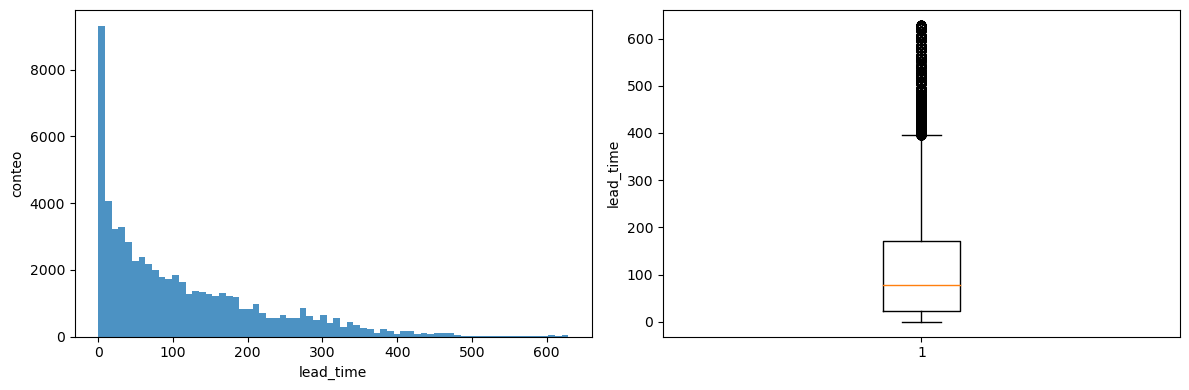

In [301]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(df['lead_time'], bins = 70 , alpha = 0.8)
ax1.set_xlabel('lead_time')
ax1.set_ylabel('conteo')
ax1.tick_params(axis='y')

ax2.boxplot(df['lead_time'])
ax2.set_ylabel('lead_time')
ax2.tick_params(axis='y')

plt.tight_layout()
plt.show()

Como se puede observar en el grafico, notamos que las reservas se predisponen a hacer con poca antelacion, mas cercana sobre la fecha de arribo al hotel. Ademas, podemos ver que la mayoria de los datos del dataset estan dentro del rango intercuartil aproximado entre 25 y 180, tal como podemos ver en los cuartiles del boxplot.

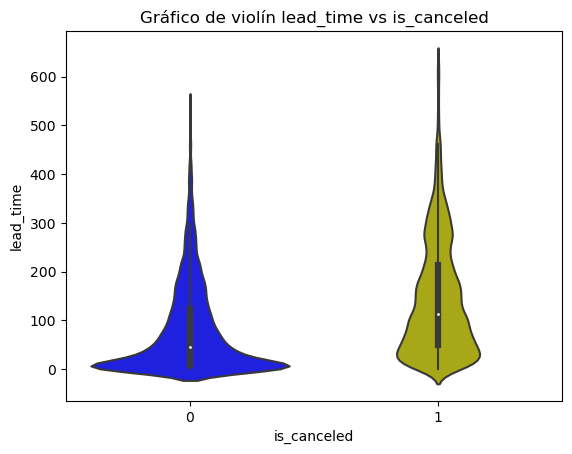

In [302]:
ax = sns.violinplot(x="is_canceled", y="lead_time", data=df,palette=["b", "y"]).set(title="Gráfico de violín lead_time vs is_canceled",xlabel='is_canceled',ylabel='lead_time') 

Aqui podemos observar cierta tendencia donde las resrevas que se hicieron con poca antelacion tienen menor probabilidad a ser canceladas. Sin embargo, esto puede estar sesgado ya que la gran mayoria de las reservas se hacen con poca antelacion, tal como podemos ver abajo. Por lo tanto, no podemos afirmar que la antelacion de la reserva sea un factor determinante para la cancelacion de la misma. 

In [303]:
df[df['lead_time'] < 50].shape

(24014, 31)

##### year

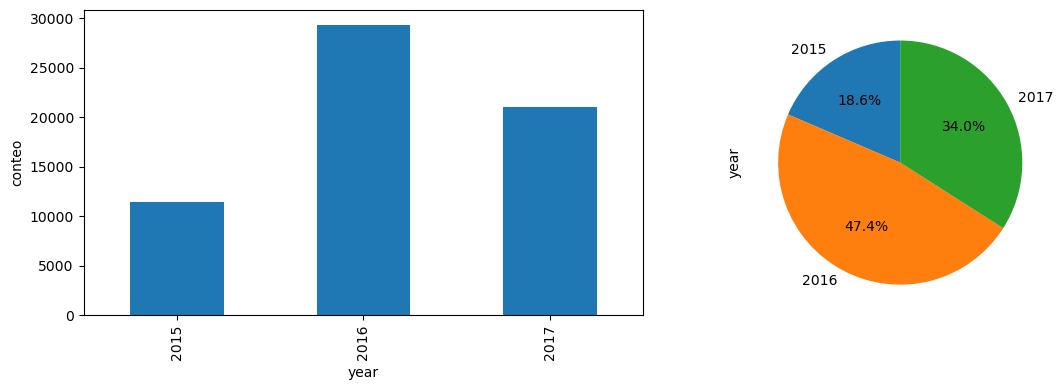

In [304]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

conteo_years = df['year'].value_counts().sort_index()

conteo_years.plot(kind='bar', ax=ax1)
ax1.set_xlabel('year')
ax1.set_ylabel('conteo')

conteo_years2 = df['year'].value_counts().sort_index().reset_index()
conteo_years2.columns = ['categoria','cantidad']

ax2.pie(conteo_years2['cantidad'], labels=conteo_years2['categoria'], autopct='%1.1f%%', startangle=90)
ax2.set_ylabel('year')


plt.tight_layout()
plt.show()

Como nos indica el grafico, el dataset solo contiene registros de los años 2015, 2016 y 2017, siendo el año predominante el 2016.

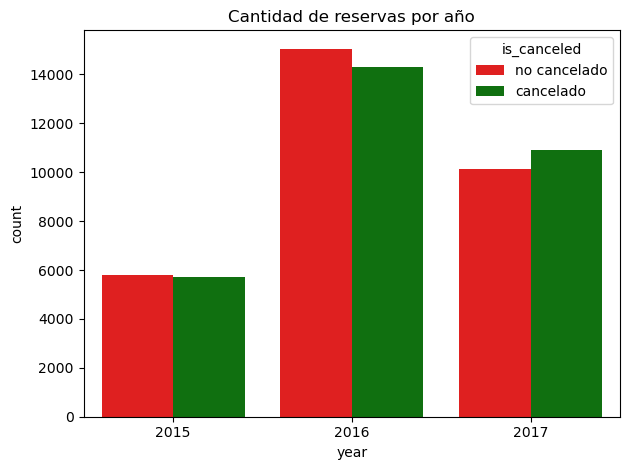

In [305]:
fig, ax = plt.subplots()
conteo_por_anio = df.groupby(['year', 'is_canceled']).size().unstack(fill_value=0)

ax = sns.countplot(x="year", hue="is_canceled", data=df, palette=["r", "g"])
ax.set_title('Cantidad de reservas por año')
plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
plt.tight_layout()
plt.show()


A su vez podemos observar que la cantidad de cancelaciones y reservas se mantienen relativamente constantes a lo largo de los años. No podemos determinar cierto patron o anomalia respecto de la variable year a simple vista.

##### week_number

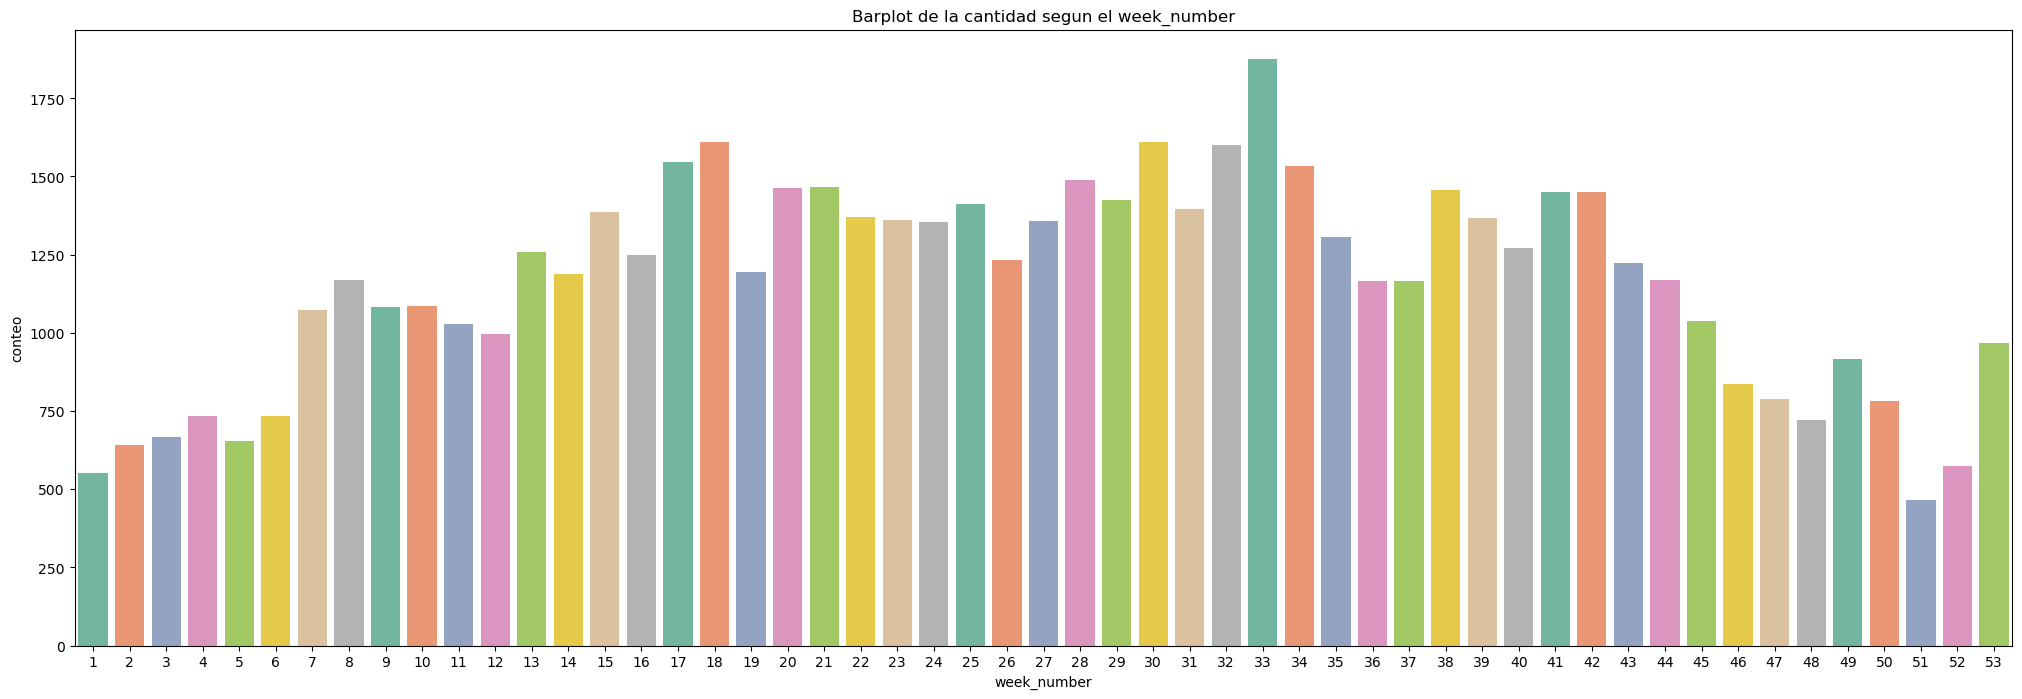

In [306]:
fig1, ax1 = plt.subplots(1, 1, figsize=(25, 8))

sns.countplot(x = 'week_number', data=df, palette = 'Set2', ax=ax1)
ax1.set_xlabel('week_number')
ax1.set_ylabel('conteo')
ax1.tick_params(axis='y')
ax1.set_title('Barplot de la cantidad segun el week_number')
plt.show()

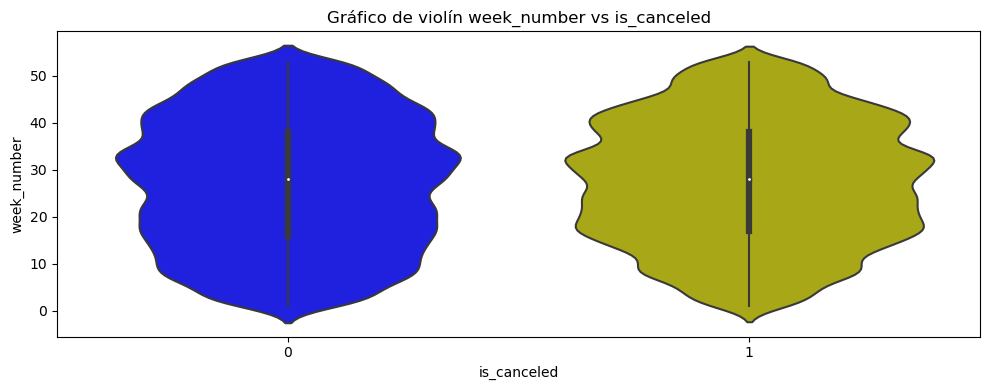

In [307]:
fig = plt.figure(figsize=(10, 4))
sns.violinplot(x="is_canceled", y="week_number", data=df,palette=["b", "y"]).set(title="Gráfico de violín week_number vs is_canceled",xlabel='is_canceled',ylabel='week_number')
plt.tight_layout()
plt.show()

Podemos notar que la distribucion de las reservas y cancelaciones a lo largo de las semanas del año es bastante uniforme, con una leve tendencia a que las reservas se hagan en las semanas 20 a 30, lo cual puede ser razonable ya que es epoca de vacaciones en el hemisferio norte. Ademas, tampoco encontramos correlacion con nuestra variable objetivo ya que el grafico de violin resulto ser bastante parejo.

In [308]:
print('Registros de la semana 53:', df[(df['week_number'] == 53)].shape)
print('Registros del 2016 de la semana 53:', df[(df['week_number'] == 53) & (df['year'] == 2016)].shape)

Registros de la semana 53: (969, 31)
Registros del 2016 de la semana 53: (581, 31)


Si bien un año tiene 52 semanas tecnicamente, pueden haber ocasiones especiales donde hayan 53, por lo tanto la informacion es correcta. Ademas, 2016 fue un año bisiesto, por lo tanto, es posible que haya tenido 53 semanas.

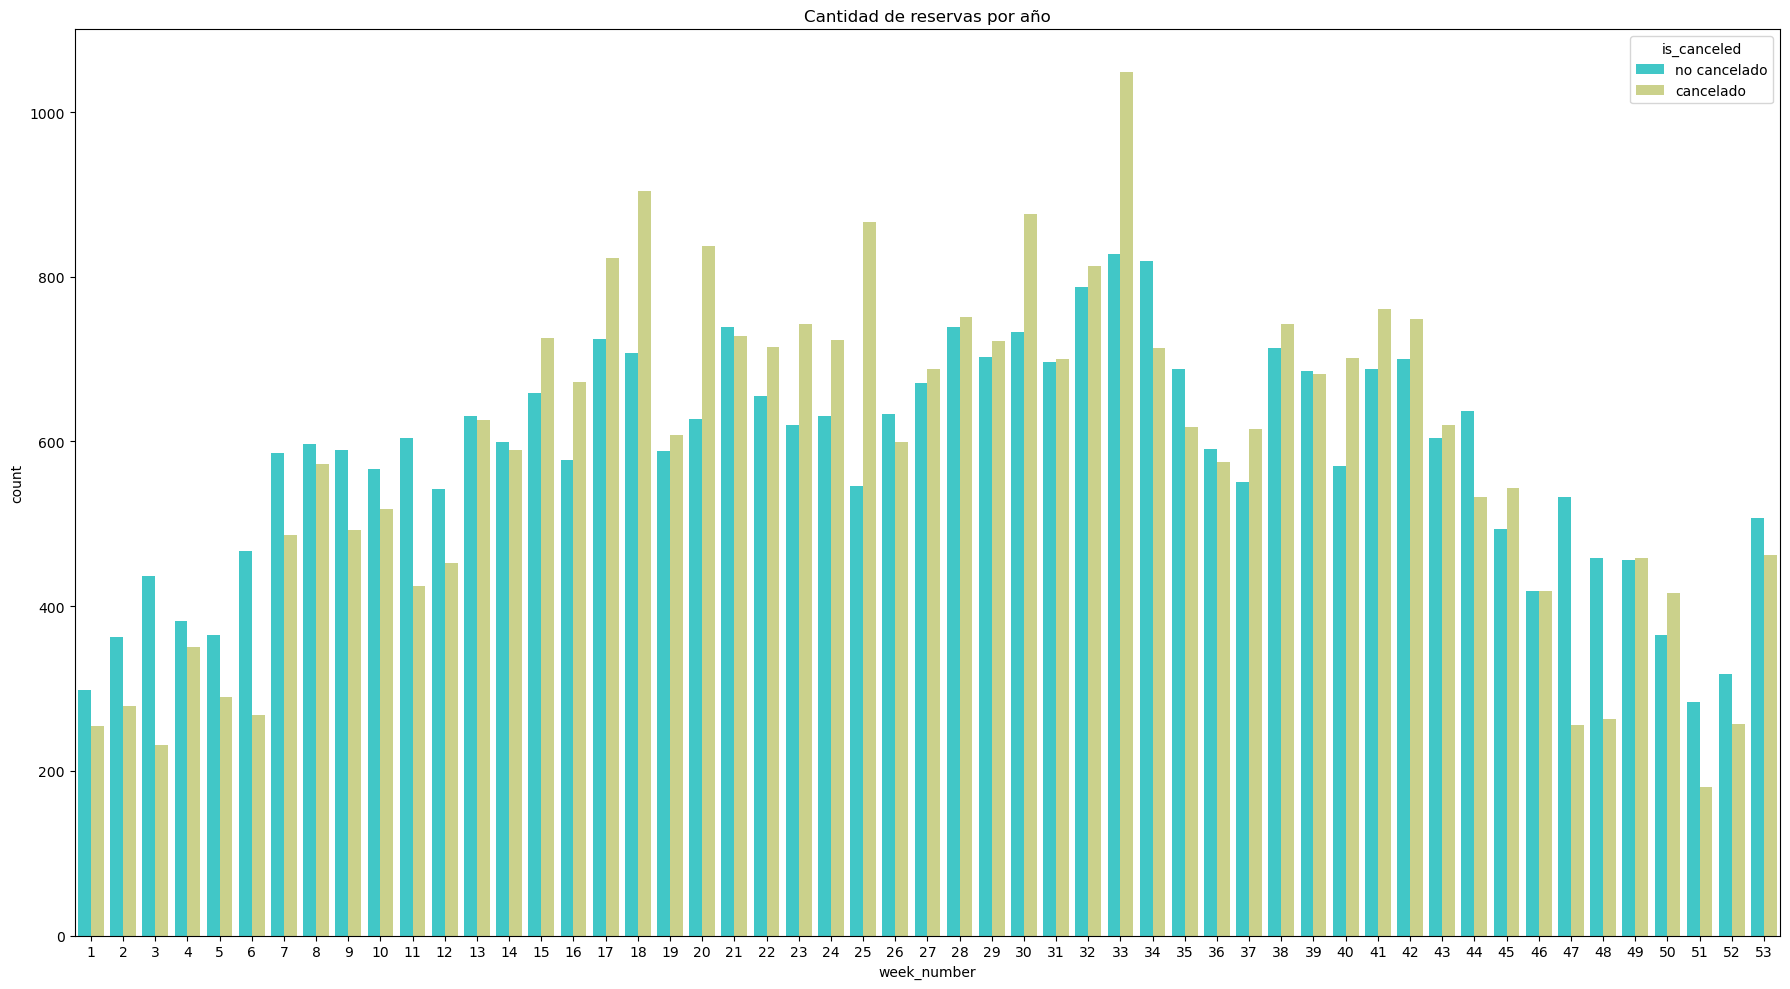

In [309]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

ax = sns.countplot(x="week_number", hue="is_canceled", data=df, palette = 'rainbow')
ax.set_title('Cantidad de reservas por año')
plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
ax.legend(title='is_canceled', loc = 'upper left')
plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
plt.tight_layout()
plt.show()

La distribucion es bastante pareja a lo largo de todas las semanas, exceptuando quizas una leve tendencia a cancelar entre la semana 17 y 25, sin embargo, no podemos determinar que la semana del año sea un factor determinante para la cancelacion de la reserva.

##### day_of_month

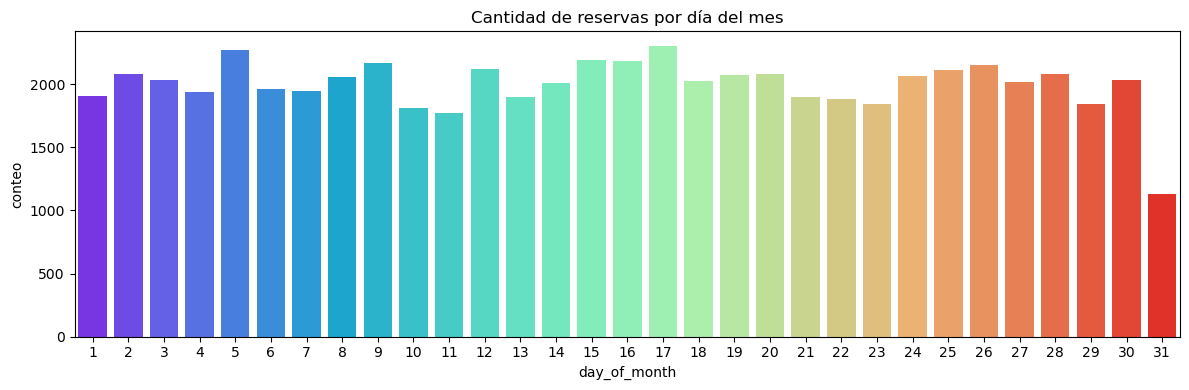

In [310]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax= sns.countplot(x = 'day_of_month', data=df, palette = 'rainbow')

ax.set_xlabel('day_of_month')
ax.set_ylabel('conteo')
ax.tick_params(axis='y')
ax.set_title('Cantidad de reservas por día del mes')

plt.tight_layout()
plt.show()

Como se puede observar su distribucion es practicamente uniforme, lo cual es esperable ya que no hay ningun motivo por el cual las reservas se hagan mas en un dia que en otro. Esto exceptuando ciertos dias festivos o feriados, pero es una minoria y van variando segun el pais de origen.

##### stays_in_weekend_nights

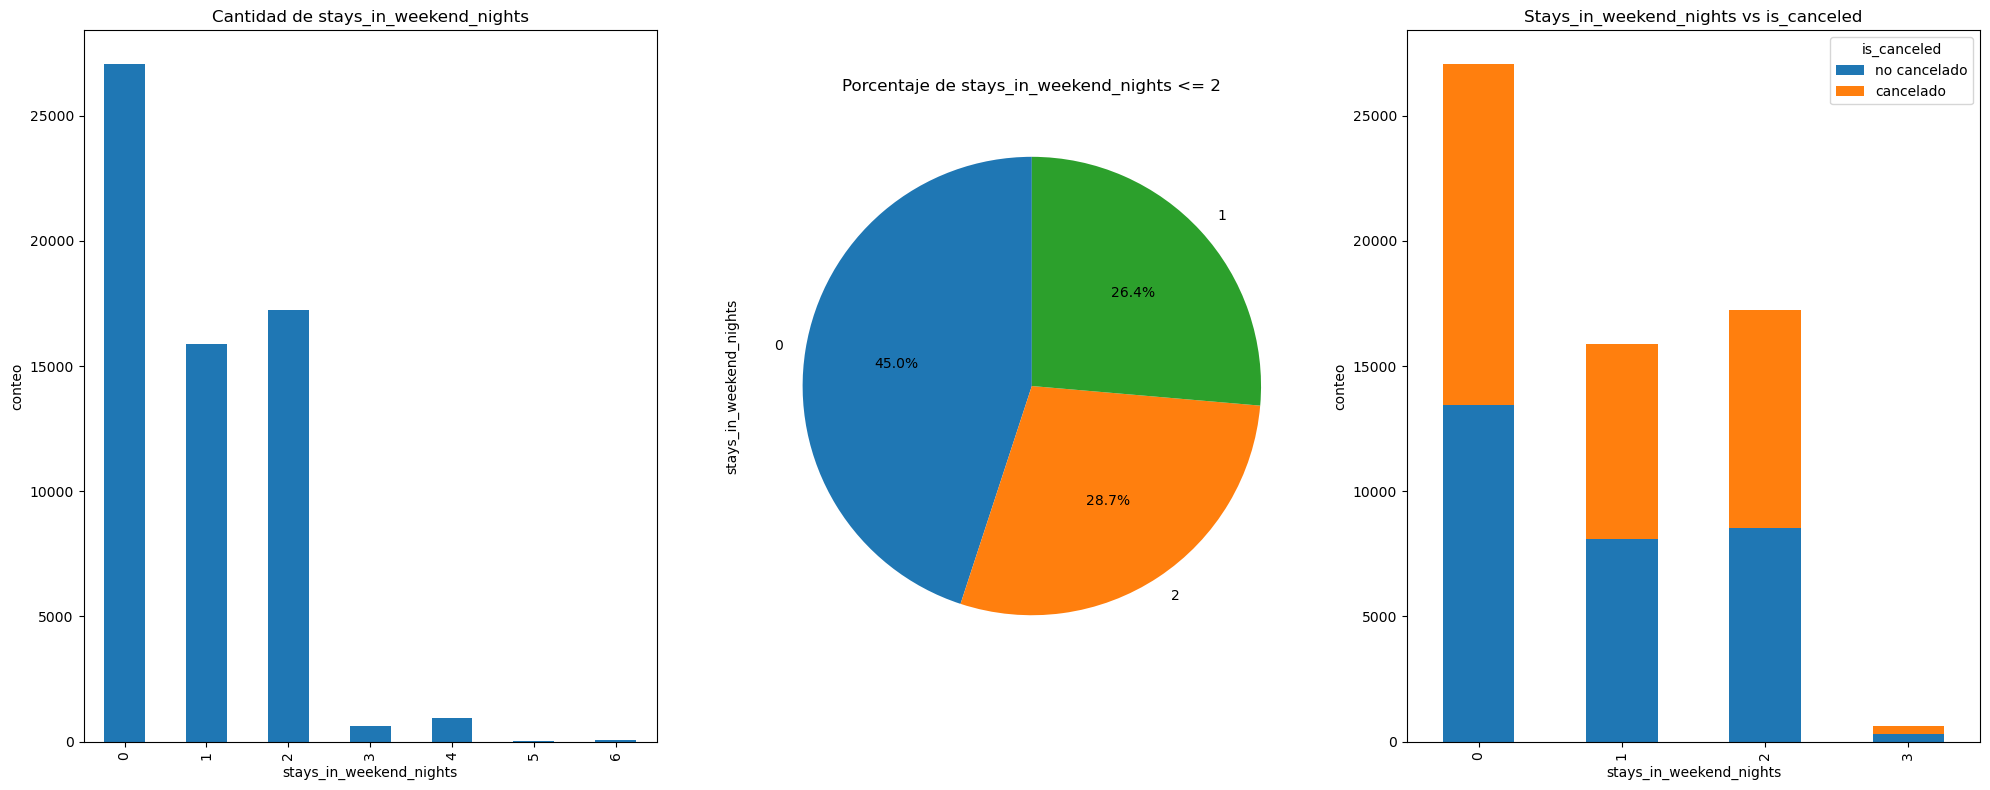

In [311]:
conteo_weekend = df[df['stays_in_weekend_nights'] < 7]['stays_in_weekend_nights'].value_counts().sort_index()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

conteo_weekend.plot(kind='bar', ax=ax1)
ax1.set_xlabel('stays_in_weekend_nights')
ax1.set_ylabel('conteo')
ax1.set_title('Cantidad de stays_in_weekend_nights')

conteo_weekend2 = df[df['stays_in_weekend_nights'] <= 2]['stays_in_weekend_nights'].value_counts().reset_index()
conteo_weekend2.columns = ['categoria','conteo']

ax2.pie(conteo_weekend2['conteo'], labels=conteo_weekend2['categoria'], autopct='%1.1f%%', startangle=90)
ax2.set_ylabel('stays_in_weekend_nights')
ax2.set_title('Porcentaje de stays_in_weekend_nights <= 2')

df_filtrado = df[df['stays_in_weekend_nights'] < 4]
conteo_weekend_filtrado = df_filtrado.groupby(['stays_in_weekend_nights', 'is_canceled']).size().unstack(fill_value=0)

conteo_weekend_filtrado.plot(kind='bar', stacked=True, ax=ax3)

ax3.set_xlabel('stays_in_weekend_nights')
ax3.set_ylabel('conteo')
ax3.set_title('Stays_in_weekend_nights vs is_canceled')

plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])

plt.tight_layout()
plt.show()

Con estos graficos nos damos cuenta que existe una tendencia a que las reservas no se hagan para fines de semana. Esto suena raro ya que la mayoria de las personas trabajan de lunes a viernes, por lo tanto, es mas probable que quieran ir a un hotel en el fin de semana.
Por otro lado, en el tercer grafico tenemos la comparacion de los cancelados y no cancelados, donde podemos ver que la distribucion es bastante similar.

##### adults and children

Vamos a analizar graficamente ambos juntos ya que creemos que pueden tener cierta relacion entre ellos.

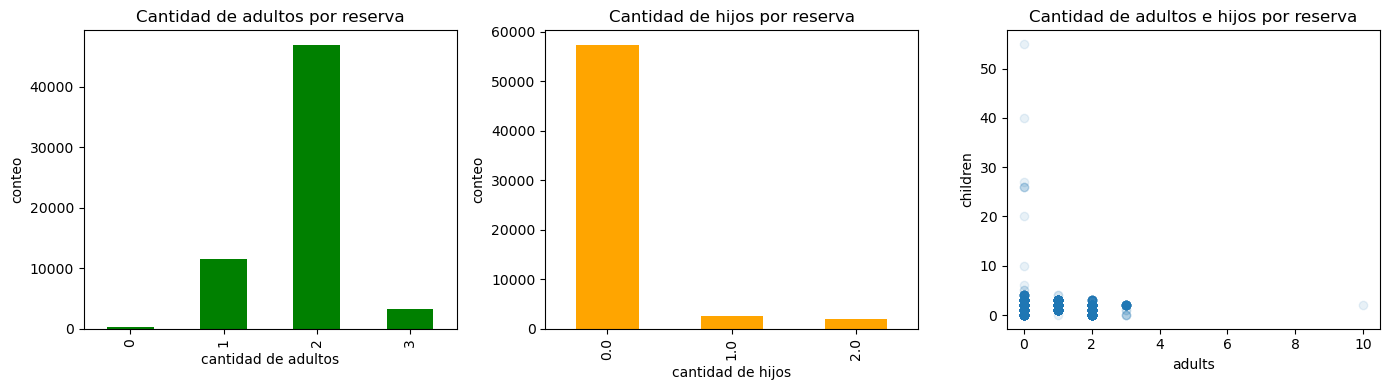

In [312]:
adultos = df['adults'].value_counts().sort_index()
adultos_filtrado = df[df['adults'] < 4]['adults'].value_counts().sort_index()
children =  df['children'].value_counts().sort_index()
children_filtrado = df[df['children'] < 3]['children'].value_counts().sort_index()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

adultos_filtrado.plot(kind='bar', ax=ax1, color = 'green')
ax1.set_xlabel('cantidad de adultos')
ax1.set_ylabel('conteo')
ax1.set_title('Cantidad de adultos por reserva')

children_filtrado.plot(kind='bar', ax=ax2, color='orange')
ax2.set_xlabel('cantidad de hijos')
ax2.set_ylabel('conteo')
ax2.set_title('Cantidad de hijos por reserva')

children_adultos_sin_nulos = df[['children','adults']].dropna()


ax3.scatter(children_adultos_sin_nulos['children'], children_adultos_sin_nulos['adults'], alpha = 0.1)
ax3.set_xlabel('adults')
ax3.set_ylabel('children')
ax3.set_title('Cantidad de adultos e hijos por reserva')

plt.tight_layout()
plt.show()

Antes de hacer los graficos decidimos flitrar el dataset para solo graficar los valores mas importantes.
Se puede ver que la gran mayoria de reservas de hotel son hechas por parejas. Ademas, nos damos cuenta que la mayoria de las reservas no tienen hijos.

In [313]:
sin_adultos = df[df['adults'] == 0]
sin_adultos.head()

,hotel,lead_time,year,month,week_number,day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent_id,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,id,is_canceled
96,City Hotel,23,2016,May,21,21,2,4,0,2.0,0,BB,IND,Online TA,TA/TO,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient,128.49,0,0,dcaf076d-bd38-47dd-8d9d-16be09cd5b08,1
212,City Hotel,315,2017,July,27,7,0,1,0,2.0,0,BB,USA,Online TA,TA/TO,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient,91.85,0,2,55c9b5f9-b5d0-49a2-9348-c6476a0bd772,1
270,City Hotel,4,2017,February,8,21,0,3,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient-Party,0.00,0,0,6a48e05e-c36a-41d0-b7e0-5f8b92dab109,1
326,City Hotel,53,2016,November,49,29,0,4,0,2.0,0,BB,ROU,Online TA,TA/TO,0,0,0,B,A,0,No Deposit,9.0,NaN,0,Transient,77.86,0,2,74fe3153-e2ae-4650-a375-05fc52881a56,0
464,City Hotel,64,2015,October,42,16,2,3,0,0.0,0,SC,FRA,Offline TA/TO,TA/TO,0,0,0,A,K,2,No Deposit,50.0,NaN,0,Transient-Party,0.00,0,0,cfe370c2-298a-4de8-82fd-f8d418febd7f,0


Aca tenemos otro inconveniente para resolver mas tarde, ya que no puede haber reservas sin adultos, y aun mas, sin personas.

##### babies

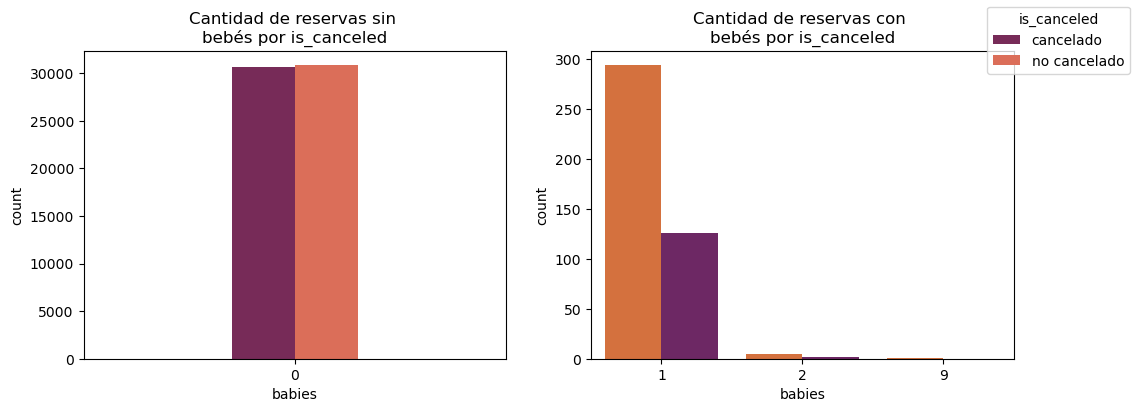

In [314]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x="babies", hue="is_canceled", data=df[df['babies'] == 0], palette="rocket", ax=ax1, width=0.3)
ax1.set_title('Cantidad de reservas sin \nbebés por is_canceled')

sns.countplot(x="babies", hue="is_canceled", data=df[df['babies'] > 0], palette="inferno_r", ax=ax2)
ax2.set_title('Cantidad de reservas con \nbebés por is_canceled')

fig.legend(title='is_canceled', labels=['cancelado', 'no cancelado'])
ax1.legend([],[],frameon=False)
ax2.legend([],[],frameon=False)
plt.show()

A simple vista podemos observar que la cantidad de bebes es en su mayoria 0 ó 1. Decidimos separar los datos en dos grupos para poder analizarlos mejor, ya que la cantidad de reservas con 0 bebes era mucho mayor. Los datos sobre 0 bebes no dicen mucho aunque si miramos el grafico de la derecha podemos ver que la cantidad de cancelaciones es levemente menor cuando hay reservas con bebes.

##### previous_cancellations

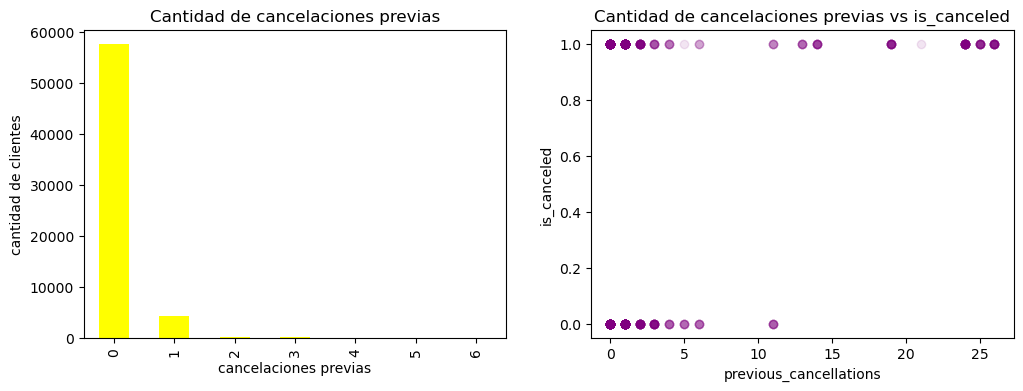

In [315]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

previous_cancellations_acotado = df[df['previous_cancellations'] < 10]
previous_cancellations_acotado_cantidad = previous_cancellations_acotado['previous_cancellations'].value_counts().sort_index()

previous_cancellations_acotado_cantidad.plot(kind='bar', ax=ax1, color = 'yellow')
ax1.set_xlabel('cancelaciones previas')
ax1.set_ylabel('cantidad de clientes')
ax1.set_title('Cantidad de cancelaciones previas')

ax2.scatter(df['previous_cancellations'], df['is_canceled'], alpha = 0.1, color = 'purple')
ax2.set_xlabel('previous_cancellations')
ax2.set_ylabel('is_canceled')
ax2.set_title('Cantidad de cancelaciones previas vs is_canceled')

plt.show()

Como es de esperarse la mayoria de clientes no tienen cancelaciones previas, decidimos realizar un filtrado de la cantidad de cancelaciones previas para mejorar la visualizacion de los datos. Sin embargo aquellos que tienen aproximadamente mas de 10 cancelaciones previas, como podemos observar en el scatter plot casi siempre cancelan la reserva. De aqui podriamos realizar en un futuro una regresion logistica para predecir si un cliente va a cancelar su reserva. 

##### previous_bookings_not_canceled

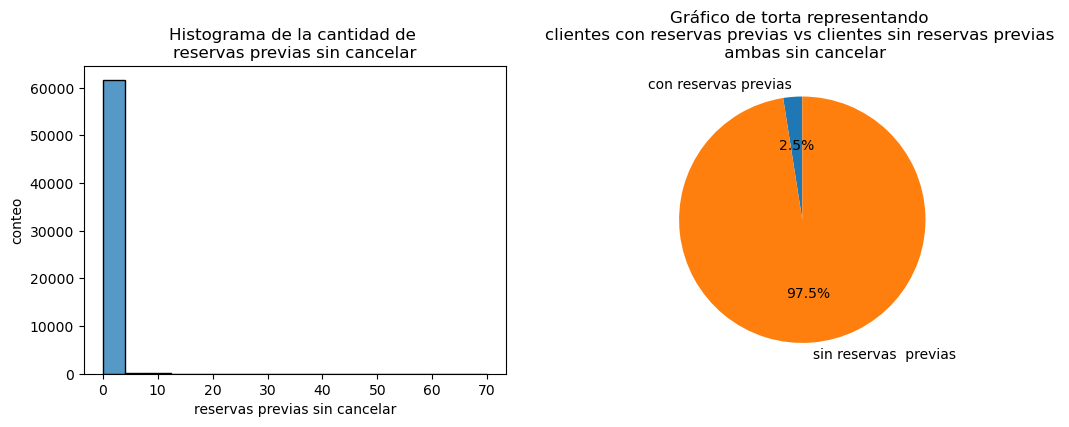

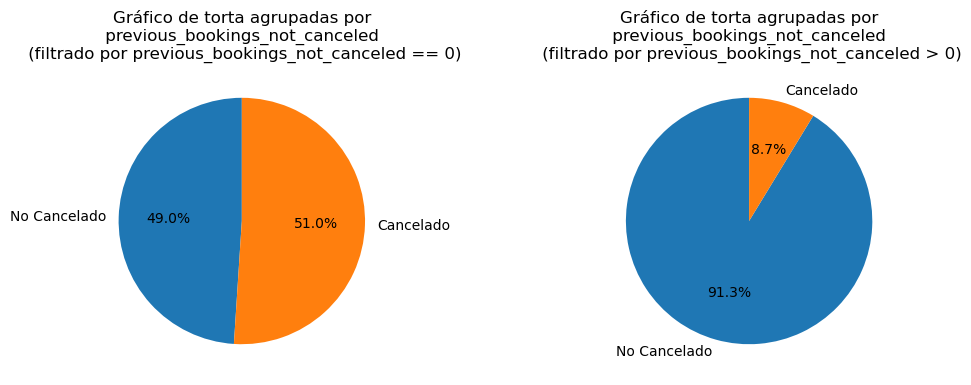

In [316]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 4))

cantidad_cero = df[df['previous_bookings_not_canceled'] == 0].reset_index()
cantidad_mayor_a_0 = df[df['previous_bookings_not_canceled'] > 0].reset_index()



sns.histplot(data=df, x='previous_bookings_not_canceled', ax=ax1,)
ax1.set_xlabel('reservas previas sin cancelar')
ax1.set_ylabel('conteo')
ax1.set_title('Histograma de la cantidad de \nreservas previas sin cancelar')

conteo_reservas_cero = cantidad_cero["previous_bookings_not_canceled"].value_counts().sort_index().reset_index()
conteo_reservas_mas_de_cero = cantidad_mayor_a_0["previous_bookings_not_canceled"].value_counts().sort_index().reset_index()
conteo_reservas_cero["categoria"] = "sin reservas  previas"
conteo_reservas_mas_de_cero["categoria"] = "con reservas previas"


conteo_reservas = pd.concat([conteo_reservas_cero, conteo_reservas_mas_de_cero]).groupby('categoria').sum().reset_index()
ax2.pie(conteo_reservas['previous_bookings_not_canceled'], labels=conteo_reservas['categoria'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Gráfico de torta representando \nclientes con reservas previas vs clientes sin reservas previas \n ambas sin cancelar')

conteo_cancelados_cero = cantidad_cero["is_canceled"].value_counts().sort_index().reset_index()
conteo_cancelados_cero.columns = ['categoria','cantidad']
conteo_cancelados_cero['categoria'] = conteo_cancelados_cero['categoria'].apply(lambda x: 'No Cancelado' if x == 0 else 'Cancelado')
ax3.pie(conteo_cancelados_cero['cantidad'], labels=conteo_cancelados_cero['categoria'], autopct='%1.1f%%', startangle=90)
ax3.set_title('Gráfico de torta agrupadas por\n previous_bookings_not_canceled \n (filtrado por previous_bookings_not_canceled == 0)')


conteo_cancelados_mayor_a_0 = cantidad_mayor_a_0["is_canceled"].value_counts().sort_index().reset_index()
conteo_cancelados_mayor_a_0.columns = ['categoria','cantidad']
conteo_cancelados_mayor_a_0['categoria'] = conteo_cancelados_mayor_a_0['categoria'].apply(lambda x: 'No Cancelado' if x == 0 else 'Cancelado')
ax4.pie(conteo_cancelados_mayor_a_0['cantidad'], labels=conteo_cancelados_mayor_a_0['categoria'], autopct='%1.1f%%', startangle=90)
ax4.set_title('Gráfico de torta agrupadas por\n previous_bookings_not_canceled \n (filtrado por previous_bookings_not_canceled > 0)')


plt.show()

Al observar el primer grafico podemos diferenciar que en su mayoria los clientes no tienen reservas previas no canceladas. En el segundo grafico partimos los datos en dos, uno donde esta la mayoria de la poblacion, que representa al grupo donde no habia reservas previas donde, es casi uniforme la distribucion entre cancelaciones. A la hora de analizar el segundo grupo, hay una tendencia a no cancelar si tiene reservas previas no canceladas. Sin embargo cabe recalcar que este ultimo grupo es mucho menor comparado al anterior

##### booking_changes

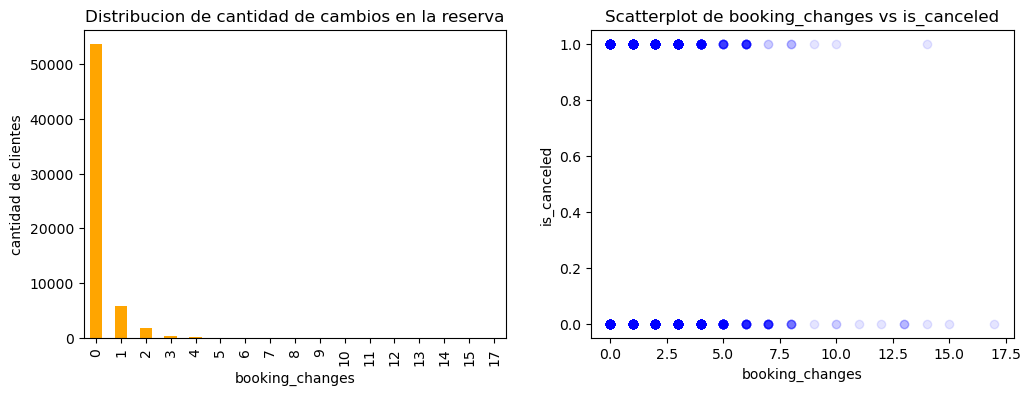

In [317]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

booking_changes_cantidad = df['booking_changes'].value_counts().sort_index()

booking_changes_cantidad.plot(kind='bar', ax=ax1, color = "orange")
ax1.set_xlabel('booking_changes')
ax1.set_ylabel('cantidad de clientes')
ax1.set_title('Distribucion de cantidad de cambios en la reserva')


ax2.scatter(df['booking_changes'], df['is_canceled'], alpha = 0.1, color = "blue")
ax2.set_xlabel('booking_changes')
ax2.set_ylabel('is_canceled')
ax2.set_title('Scatterplot de booking_changes vs is_canceled')

plt.show()

La distribucion es de esperar ya que en su mayoria no se realizan cambios de reserva. De todas formas se observa cierta tendencia a mantener la reserva si es que se realizaron cambios. De nuevo podriamos obtener un predictor con una regresion logistica.

##### days_in_waiting_list

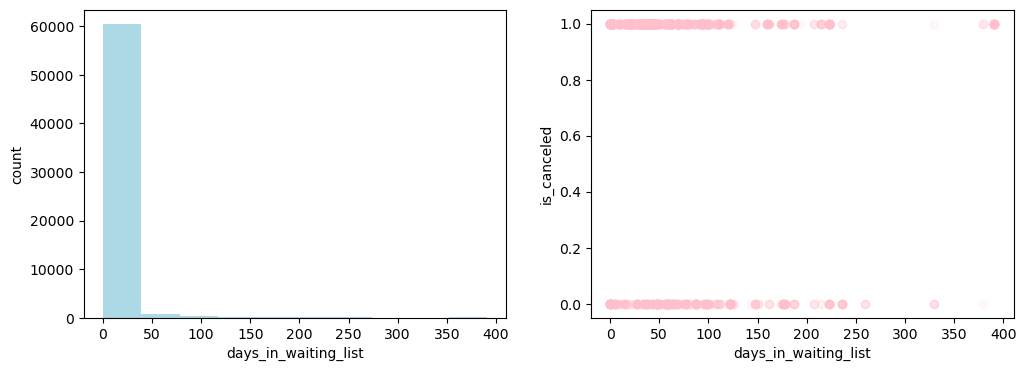

In [318]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


df['days_in_waiting_list'].plot(kind='hist', ax=ax1, color = "lightblue")
ax1.set_xlabel('days_in_waiting_list')
ax1.set_ylabel('count')

ax2.scatter(df['days_in_waiting_list'], df['is_canceled'], alpha = 0.1, color = "pink")
ax2.set_xlabel('days_in_waiting_list')
ax2.set_ylabel('is_canceled')

plt.show()

Como podemos observar en la distribucion, en su mayoria las reservas se resuelven dentro de los primeros 40 dias de haber realizado la reserva. Ademas en el scatter plot no podemos ver ninguna correlacion con las cancelaciones a priori

##### required_car_parking_spaces

Text(0.5, 1.0, 'Gráfico de torta agrupadas por\n required_car_parking_spaces \n (filtrado por required_car_parking_spaces = 0)')

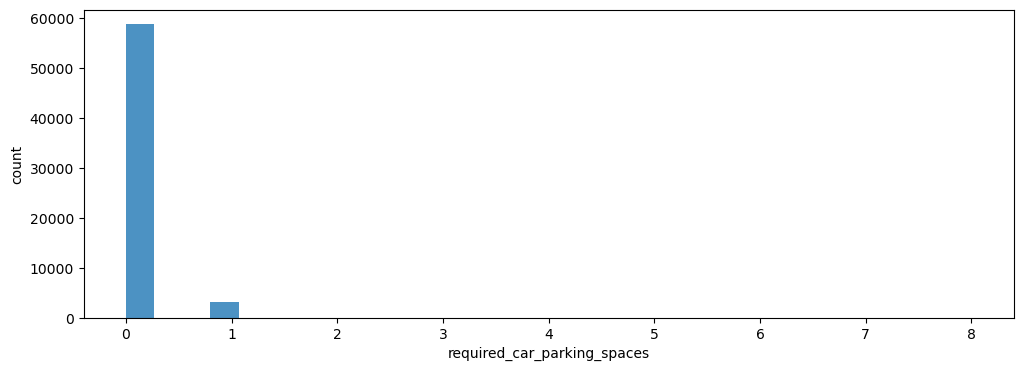

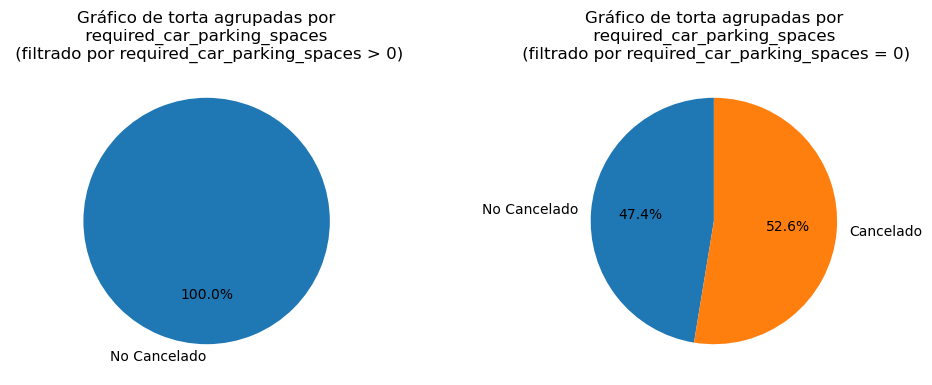

In [319]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 4))
fig2,  (ax2, ax3) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(df['required_car_parking_spaces'], bins = 30 , alpha = 0.8)
ax1.set_xlabel('required_car_parking_spaces')
ax1.set_ylabel('count')


conteo_requiere_espacio = df[df["required_car_parking_spaces"] > 0]["is_canceled"].value_counts().sort_index().reset_index()
conteo_requiere_espacio.columns = ['categoria','cantidad']
conteo_requiere_espacio['categoria'] = conteo_requiere_espacio['categoria'].apply(lambda x: 'No Cancelado' if x == 0 else 'Cancelado')
ax2.pie(conteo_requiere_espacio['cantidad'], labels=conteo_requiere_espacio['categoria'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Gráfico de torta agrupadas por\n required_car_parking_spaces \n (filtrado por required_car_parking_spaces > 0)')


conteo_no_requiere_espacio = df[df["required_car_parking_spaces"] == 0]["is_canceled"].value_counts().sort_index().reset_index()
conteo_no_requiere_espacio.columns = ['categoria','cantidad']
conteo_no_requiere_espacio['categoria'] = conteo_no_requiere_espacio['categoria'].apply(lambda x: 'No Cancelado' if x == 0 else 'Cancelado')
ax3.pie(conteo_no_requiere_espacio['cantidad'], labels=conteo_no_requiere_espacio['categoria'], autopct='%1.1f%%', startangle=90)
ax3.set_title('Gráfico de torta agrupadas por\n required_car_parking_spaces \n (filtrado por required_car_parking_spaces = 0)')


A pesar que la mayoria de la poblacion se encuentra en el grupo donde no se requiere ningun estacionamiento, y dentro de ese gurpo de distribuyen uniformemente entre los cancelados y no cancelados, podemos observar que en el grupo donde se requiere un estacionamiento, la mayoria de las reservas no se cancelan. Sin embargo hay que tener en consideracion que este grupo es mucho menor comparado al anterior.

##### total_of_special_requests

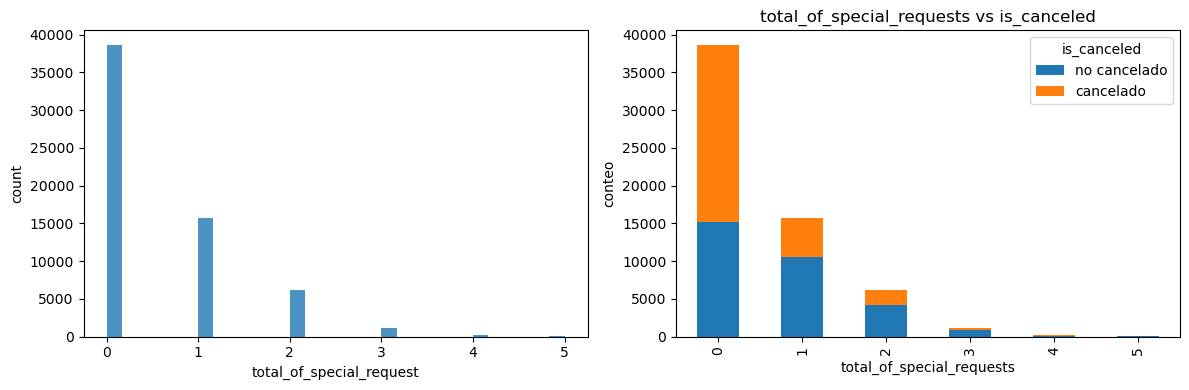

In [320]:
fig2,  (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(df['total_of_special_requests'], bins = 30 , alpha = 0.8)
ax1.set_xlabel('total_of_special_request')
ax1.set_ylabel('count')



conteo_special_requests = df.groupby(['total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)

conteo_special_requests.plot(kind='bar', stacked=True, ax=ax2)

ax2.set_xlabel('total_of_special_requests')
ax2.set_ylabel('conteo')
ax2.set_title('total_of_special_requests vs is_canceled')
plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
plt.tight_layout()
plt.show()

Podemos notar como en su mayoria las reservas no tienden a tener pedidos especiales, y la cantidad decrece exponencialmente a medida que aumentan los pedidos especiales. De todas formas podemos observar que en los grupos con pedidos especiales suele haber menos cancelaciones.

##### average_daily_rate

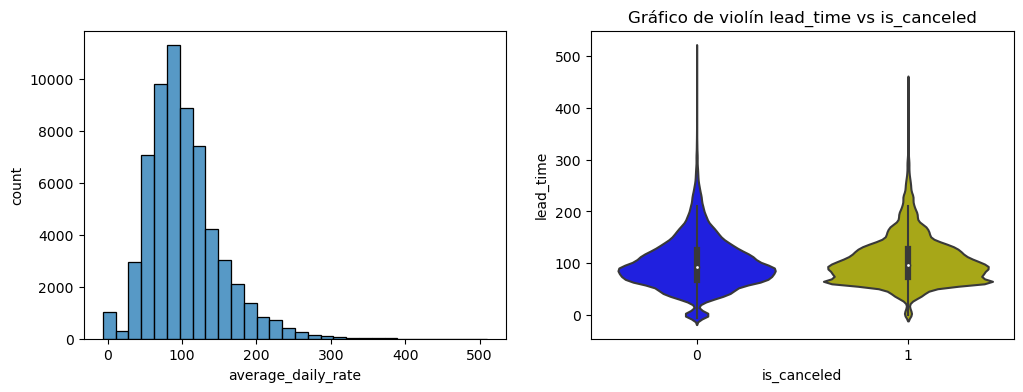

In [321]:
fig2,  (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1 = sns.histplot(data=df, x='average_daily_rate', ax=ax1, bins=30)
ax1.set_xlabel('average_daily_rate')
ax1.set_ylabel('count')


ax2 = sns.violinplot(x="is_canceled", y="average_daily_rate", data=df,palette=["b", "y"]).set(title="Gráfico de violín lead_time vs is_canceled",xlabel='is_canceled',ylabel='lead_time') 

Con estos grafico podriamos deducir que el average_daily_rate tiene una distribucion que se asemeja a una normal o una gamma.
Tambien podemos observar que no hay una tendencia marcada entre las cancelaciones y el average_daily_rate, salvo cuando el mismo tiene valores muy altos, donde no se cancelan.

#### Cualitativas

Por otro lado, con las variables cualitativas analizamos los diversos valores que pueden tomar, junto con la frecuencia que tomo cada valor y su respectivo porcentaje del total.

In [322]:
columnas_cualitativas = df[[
  "hotel",
  "meal_type",
  "country",
  "market_segment",
  "distribution_channel",
  "reserved_room_type",
  "assigned_room_type",
  "deposit_type",
  "agent_id",
  "company",
  "customer_type",
  "is_canceled",
  "is_repeated_guest"
]]

tablas_de_frecuencia = {}

for columna in columnas_cualitativas.columns:
    frecuencia = df[columna].value_counts().reset_index()
    frecuencia.columns = ['Categoría', 'Frecuencia']
    frecuencia['Porcentaje'] = round(frecuencia['Frecuencia'] / df[columna].count() * 100, 2)
    tablas_de_frecuencia[columna] = frecuencia

for columna, tabla in tablas_de_frecuencia.items():
    print(f"Tabla de Frecuencias para '{columna}':")
    display(tabla)
    print("\n")

Tabla de Frecuencias para 'hotel':


,Categoría,Frecuencia,Porcentaje
0,City Hotel,42129,68.05
1,Resort Hotel,19784,31.95




Tabla de Frecuencias para 'meal_type':


,Categoría,Frecuencia,Porcentaje
0,BB,47837,77.26
1,HB,7452,12.04
2,SC,5556,8.97
3,Undefined,591,0.95
4,FB,477,0.77




Tabla de Frecuencias para 'country':


,Categoría,Frecuencia,Porcentaje
0,PRT,27950,45.31
1,GBR,5733,9.29
2,FRA,4809,7.80
3,ESP,4210,6.82
4,DEU,3312,5.37
...,...,...,...
144,HND,1,0.00
145,FJI,1,0.00
146,LIE,1,0.00
147,ATA,1,0.00




Tabla de Frecuencias para 'market_segment':


,Categoría,Frecuencia,Porcentaje
0,Online TA,29269,47.27
1,Offline TA/TO,12384,20.00
2,Groups,11545,18.65
3,Direct,5757,9.30
4,Corporate,2484,4.01
5,Complementary,359,0.58
6,Aviation,113,0.18
7,Undefined,2,0.00




Tabla de Frecuencias para 'distribution_channel':


,Categoría,Frecuencia,Porcentaje
0,TA/TO,51849,83.74
1,Direct,6799,10.98
2,Corporate,3172,5.12
3,GDS,89,0.14
4,Undefined,4,0.01




Tabla de Frecuencias para 'reserved_room_type':


,Categoría,Frecuencia,Porcentaje
0,A,45134,72.90
1,D,9585,15.48
2,E,3249,5.25
3,F,1451,2.34
4,G,1090,1.76
5,B,580,0.94
6,C,482,0.78
7,H,334,0.54
8,P,7,0.01
9,L,1,0.00




Tabla de Frecuencias para 'assigned_room_type':


,Categoría,Frecuencia,Porcentaje
0,A,40007,64.62
1,D,12190,19.69
2,E,3779,6.10
3,F,1821,2.94
4,G,1277,2.06
5,C,1127,1.82
6,B,1056,1.71
7,H,384,0.62
8,I,145,0.23
9,K,119,0.19




Tabla de Frecuencias para 'deposit_type':


,Categoría,Frecuencia,Porcentaje
0,No Deposit,51685,83.48
1,Non Refund,10150,16.39
2,Refundable,78,0.13




Tabla de Frecuencias para 'agent_id':


,Categoría,Frecuencia,Porcentaje
0,9.0,17004,31.48
1,240.0,7386,13.67
2,1.0,4424,8.19
3,14.0,1700,3.15
4,6.0,1639,3.03
...,...,...,...
291,420.0,1,0.00
292,352.0,1,0.00
293,450.0,1,0.00
294,283.0,1,0.00




Tabla de Frecuencias para 'company':


,Categoría,Frecuencia,Porcentaje
0,40.0,390,12.37
1,223.0,364,11.55
2,67.0,169,5.36
3,45.0,118,3.74
4,153.0,106,3.36
...,...,...,...
271,305.0,1,0.03
272,275.0,1,0.03
273,461.0,1,0.03
274,220.0,1,0.03




Tabla de Frecuencias para 'customer_type':


,Categoría,Frecuencia,Porcentaje
0,Transient,47449,76.64
1,Transient-Party,12168,19.65
2,Contract,2033,3.28
3,Group,263,0.42




Tabla de Frecuencias para 'is_canceled':


,Categoría,Frecuencia,Porcentaje
0,0,30972,50.03
1,1,30941,49.97




Tabla de Frecuencias para 'is_repeated_guest':


,Categoría,Frecuencia,Porcentaje
0,0,60180,97.2
1,1,1733,2.8


A continuacion vamos a analizar graficamente las variables mas relevantes dentro de las categoricas.

##### Hotel

Como sabemos, solo hay dos opciones de hotel en todo el dataset, donde la opcion de City Hotel es ampliamente mas reservada que la opcion de Resort Hotel. Es por esto que realizar un grafico no va a aportar mucha informacion extra.

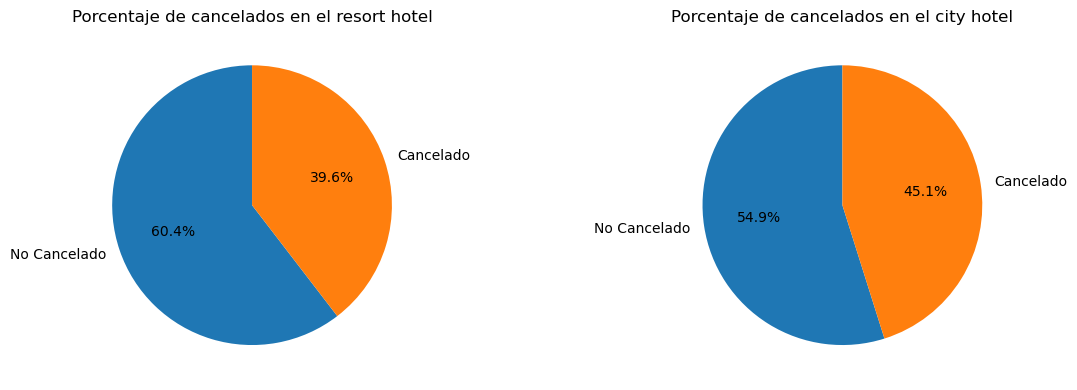

In [323]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

resort_hotel = df[df['hotel'] == 'Resort Hotel']['is_canceled'].value_counts().reset_index()
resort_hotel.columns = ['is_canceled', 'cantidad']
resort_hotel['is_canceled'][0] = 'No Cancelado'
resort_hotel['is_canceled'][1] = 'Cancelado'
ax1.pie(resort_hotel['cantidad'], labels=resort_hotel['is_canceled'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Porcentaje de cancelados en el resort hotel')

city_hotel = df[df['hotel'] == 'City Hotel']['is_canceled'].value_counts().reset_index()
city_hotel.columns = ['is_canceled', 'cantidad']
city_hotel['is_canceled'][0] = 'No Cancelado'
city_hotel['is_canceled'][1] = 'Cancelado'
ax2.pie(city_hotel['cantidad'], labels=city_hotel['is_canceled'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Porcentaje de cancelados en el city hotel')

plt.tight_layout()
plt.show()

Ademas, podemos observar que se suelen realizar mas cancelaciones en el City Hotel que en el resort hotel, sin embargo, esto puede deberse a que hay mas reservas en el city hotel.

##### meal_type

SC y undefined significa lo mismo, o sea, que no tiene meal. Es por esto que decidimos unificarlos en un solo grupo en el primer grafico. En el segundo grafico no lo unimos poque tendriamos que alterar el dataset original. Esta tarea seguro la hagamos mas tarde cuando hagamos el analisis de datos faltantes y outliers.

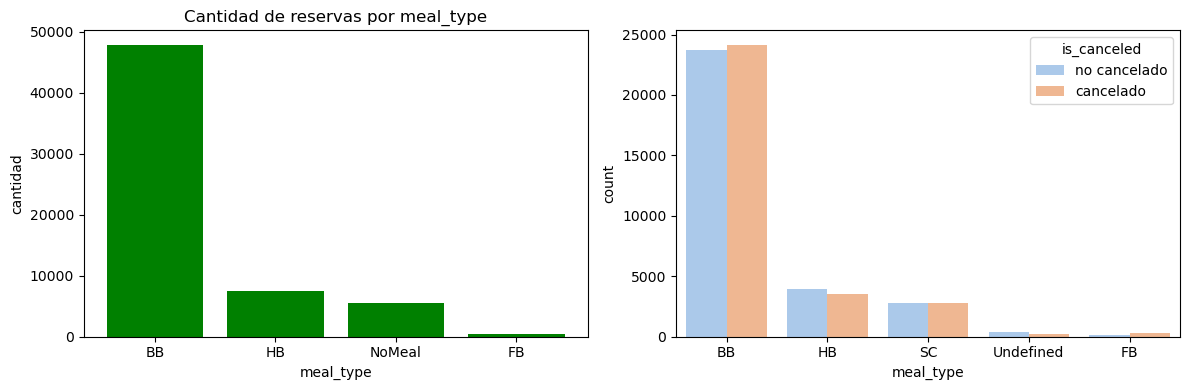

In [324]:
meal_type = df[['meal_type']].value_counts().reset_index()
meal_type.columns = ['meal_type', 'cantidad']
meal_type['meal_type'].replace(['SC', 'Undefined'], 'NoMeal', inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.bar(meal_type['meal_type'], meal_type['cantidad'], color = 'green')
ax1.set_xlabel('meal_type')
ax1.set_ylabel('cantidad')
ax1.set_title('Cantidad de reservas por meal_type')

ax2 = sns.countplot(x="meal_type", hue="is_canceled", data=df, palette = 'pastel')

plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
plt.tight_layout() 
plt.show()

Se nota una gran tendencia a resrevar con el meal_type de bed and breakfast, y en segundo lugar el de half board parejo con el no meal packages. Sin embargo, no podemos observar una tendencia clara entre las cancelaciones y el meal_type.

##### country

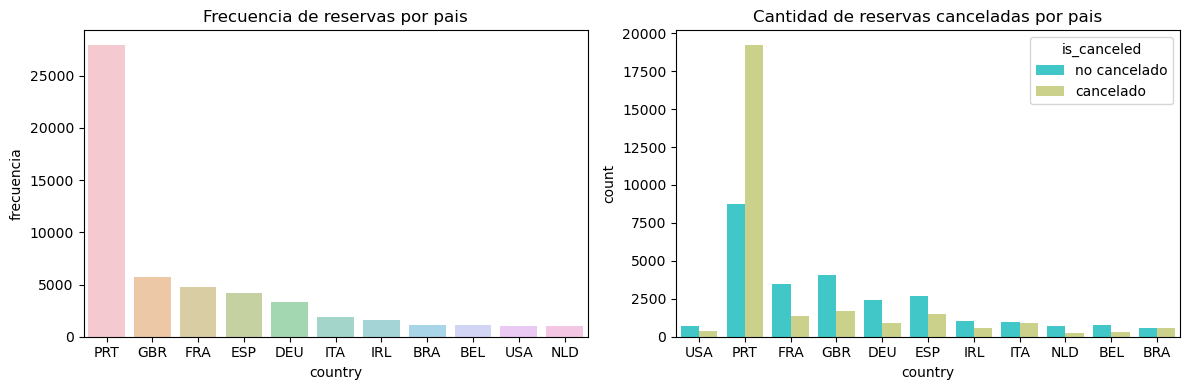

In [325]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

paises = df[['country']].value_counts().reset_index()
paises.columns = ['country', 'cantidad']
paises_mayoritarios = paises[paises['cantidad'] > 900]
sns.barplot(x='country', y='cantidad', data=paises_mayoritarios, alpha=0.5, ax = ax1).set(title="Frecuencia de reservas por pais",ylabel='frecuencia',xlabel='country')

df_filtrado = df[df['country'].isin(paises_mayoritarios['country'])]
sns.countplot(x="country", hue="is_canceled", data=df_filtrado, palette="rainbow", ax=ax2)
ax2.set_title('Cantidad de reservas canceladas por pais')

plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
plt.tight_layout()
plt.show()


Aca si encontramos dos grandes patrones, y ambos se deben a la misma razon. El primero es que la gran mayoria de las reservas provienen de paises europeos. El segundo patron es que las reservas de personas provenientes de Portugal son canceladas bastante mas seguido. La razon que le podemos dar a esto es que, si bien en el paper no especifica bien la localizacion de los hoteles (no encontramos info), podemos asumir que los hoteles estan en Portugal, ya que los institutos que realizaron el paper son provenientes de Portugal.

##### market_segment

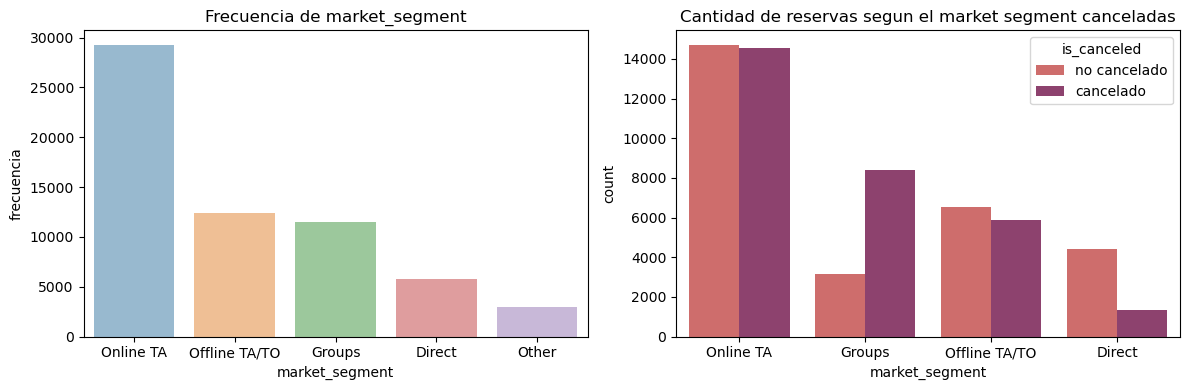

In [326]:
market_segment = df['market_segment'].value_counts().reset_index()
market_segment.columns = ['market_segment', 'cantidad']

cantidad = market_segment[market_segment['cantidad'] < 2500]['cantidad'].sum()
market_segment.drop(market_segment[market_segment['cantidad'] < 2500].index, inplace = True)
market_segment.loc[len(market_segment.index)] = ['Other', cantidad]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
count_filtrado = market_segment[market_segment['cantidad'] > 2500]
df_filtrado = df[df['market_segment'].isin(count_filtrado['market_segment'])]


sns.countplot(x="market_segment", hue="is_canceled", data=df_filtrado, palette="flare", ax=ax2)
ax2.set_title('Cantidad de reservas segun el market segment canceladas')

sns.barplot(x='market_segment', y='cantidad', data=market_segment, alpha=0.5, ax = ax1).set(title="Frecuencia de market_segment",ylabel='frecuencia',xlabel='market_segment')
plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
plt.tight_layout()
plt.show()

Otra informacion clave para nuestra variable target es que las reservas hechas por el market segment de Groups se predisponen mas a ser canceladas.

##### distribution_channel

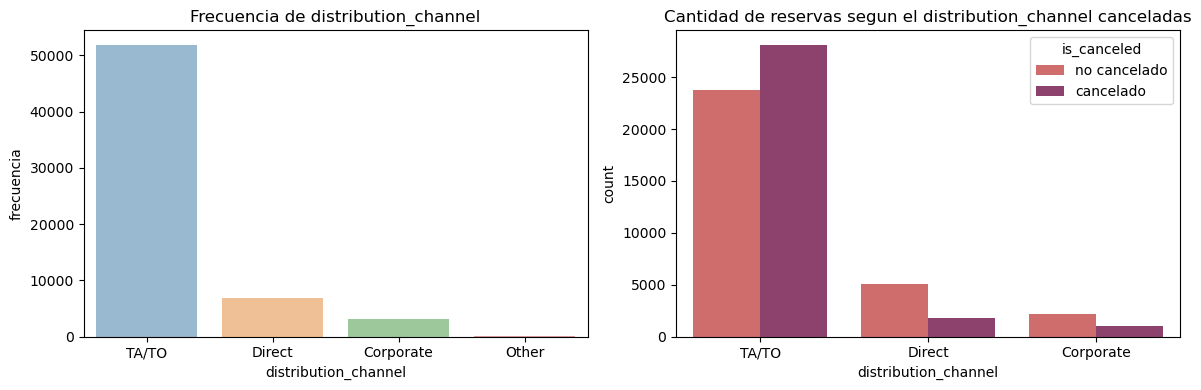

In [327]:
distribution_channel = df['distribution_channel'].value_counts().reset_index()
distribution_channel.columns = ['distribution_channel', 'cantidad']

cantidad = distribution_channel[distribution_channel['cantidad'] < 2500]['cantidad'].sum()
distribution_channel.drop(distribution_channel[distribution_channel['cantidad'] < 2500].index, inplace = True)
distribution_channel.loc[len(distribution_channel.index)] = ['Other', cantidad]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
count_filtrado = distribution_channel[distribution_channel['cantidad'] > 2500]
df_filtrado = df[df['distribution_channel'].isin(count_filtrado['distribution_channel'])]


sns.countplot(x="distribution_channel", hue="is_canceled", data=df_filtrado, palette="flare", ax=ax2)
ax2.set_title('Cantidad de reservas segun el distribution_channel canceladas')

sns.barplot(x='distribution_channel', y='cantidad', data=distribution_channel, alpha=0.5, ax = ax1).set(title="Frecuencia de distribution_channel",ylabel='frecuencia',xlabel='distribution_channel')
plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
plt.tight_layout()
plt.show()

##### assigned_room_type y reserved_room_type

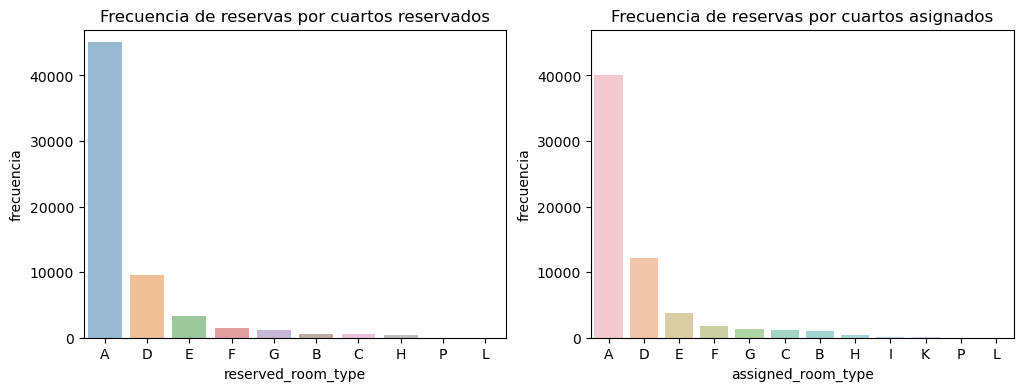

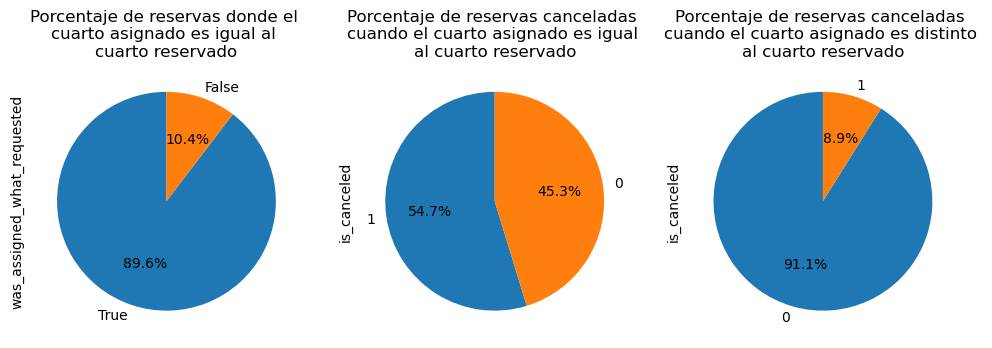

In [328]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig2, (ax3, ax4, ax5) = plt.subplots(1, 3, figsize=(12, 4))

cuartos_asignados = df[['assigned_room_type']].value_counts().reset_index()
cuartos_asignados.columns = ['assigned_room_type', 'cantidad']
sns.barplot(x='assigned_room_type', y='cantidad', data=cuartos_asignados, alpha=0.5, ax = ax2).set(title="Frecuencia de reservas por cuartos asignados",ylabel='frecuencia',xlabel='assigned_room_type')

cuartos_pedidos = df[['reserved_room_type']].value_counts().reset_index()
cuartos_pedidos.columns = ['reserved_room_type', 'cantidad']
sns.barplot(x='reserved_room_type', y='cantidad', data=cuartos_pedidos, alpha=0.5, ax = ax1).set(title="Frecuencia de reservas por cuartos reservados",ylabel='frecuencia',xlabel='reserved_room_type')

ax1.set_ybound(0, 47000)
ax2.set_ybound(0, 47000)


assigned_vs_requested = (df['assigned_room_type'] == df['reserved_room_type']).reset_index()
assigned_vs_requested.columns = ['index', 'was_assigned_what_requested']

assigned_vs_requested['was_assigned_what_requested'].value_counts().plot(kind='pie', ax=ax3, autopct='%1.1f%%', startangle=90)
ax3.set_title('Porcentaje de reservas donde el \ncuarto asignado es igual al \ncuarto reservado')

df[df['assigned_room_type'] == df['reserved_room_type']]['is_canceled'].value_counts().plot(kind='pie', ax=ax4, autopct='%1.1f%%', startangle=90)
ax4.set_title('Porcentaje de reservas canceladas \ncuando el cuarto asignado es igual \nal cuarto reservado')

df[df['assigned_room_type'] != df['reserved_room_type']]['is_canceled'].value_counts().plot(kind='pie', ax=ax5, autopct='%1.1f%%', startangle=90)
ax5.set_title('Porcentaje de reservas canceladas \ncuando el cuarto asignado es distinto \nal cuarto reservado')

plt.show()

Como podemos ver en la primer figura, la alta demanda del tipo A no da abasto y se tiene que repartir entre otros tipos de habitacion. Eso se ve representado en la segunda figura, donde aproximadamente el 10% de las reservas no coinciden con el tipo de habitacion que se asigno. Una estadistica interesante es que sobre ese 10% que no coinciden, el 91% de las reservas se mantienen.

##### deposit_type

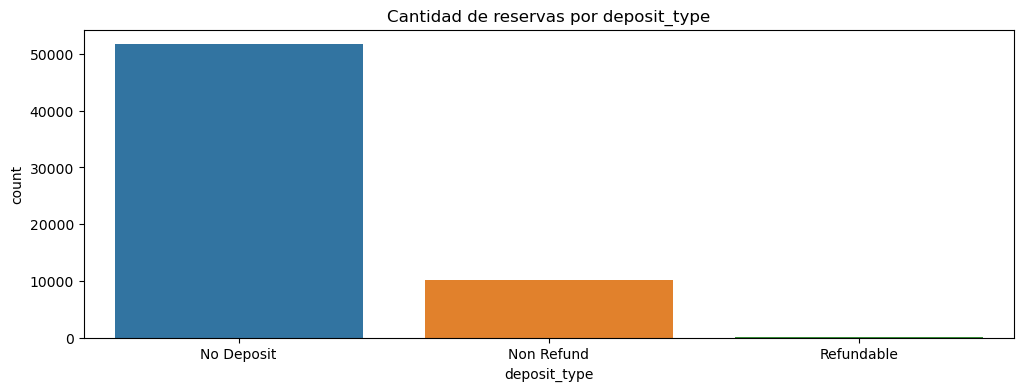

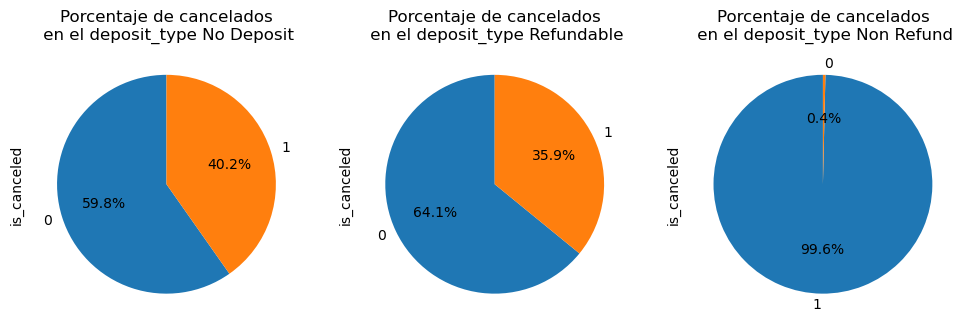

In [329]:
fig, ax = plt.subplots(figsize=(12, 4))
fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
sns.countplot(x="deposit_type",  data=df, ax=ax)
ax.set_title('Cantidad de reservas por deposit_type')

df[df['deposit_type'] == 'No Deposit']['is_canceled'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=90)
ax1.set_title('Porcentaje de cancelados\n en el deposit_type No Deposit')

df[df['deposit_type'] == 'Refundable']['is_canceled'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
ax2.set_title('Porcentaje de cancelados\n en el deposit_type Refundable')

df[df['deposit_type'] == 'Non Refund']['is_canceled'].value_counts().plot(kind='pie', ax=ax3, autopct='%1.1f%%', startangle=90)
ax3.set_title('Porcentaje de cancelados\n en el deposit_type Non Refund')

plt.show()

Al analizar el grafico podemos concluir que aquellas reservas sin deposito son mas frecuentes y por una pequeña diferencia suelen mantener la reserva, al igual que las reservas con reembolso. Sin embargo, en las reservas con deposito sin reembolso, en su gran mayoria son canceladas. 

##### agent_id

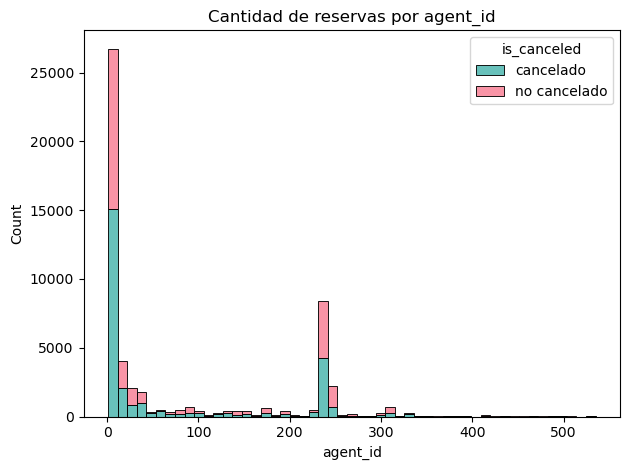

In [330]:
ax = sns.histplot(x="agent_id", hue="is_canceled", data=df, palette = 'husl', multiple="stack")
ax.set_title('Cantidad de reservas por agent_id')

plt.legend(title='is_canceled', labels=['cancelado', 'no cancelado'])
plt.tight_layout()
plt.show()


Como podiamos ver por la tabl de frecuencias, la cantidad de agentes distintos es muy grande y es dificil de analizar graficamente. Del grafico podemos rescatar que las distribuciones son muy parejas, y que la mayoria de los agentes tienen una cantidad de reservas canceladas similar a la de reservas no canceladas.

##### company

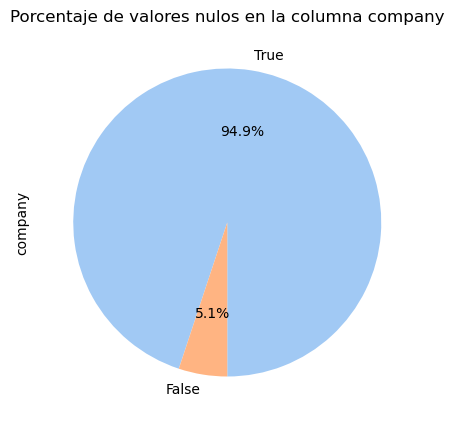

In [331]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

df['company'].isna().value_counts().plot(kind='pie', ax=ax1,startangle=270, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
ax1.title.set_text('Porcentaje de valores nulos en la columna company')

plt.show()


Viendo la tabla de frecuencias, hay aproximadamente 270 comañias distintas, lo que dificulta en analisis de la distribucion y por el pie chart podemos ver que ademas en su mayoria son nulos, por lo que no creemos que esta variable aporte informacion valiosa al analisis.

##### customer_type

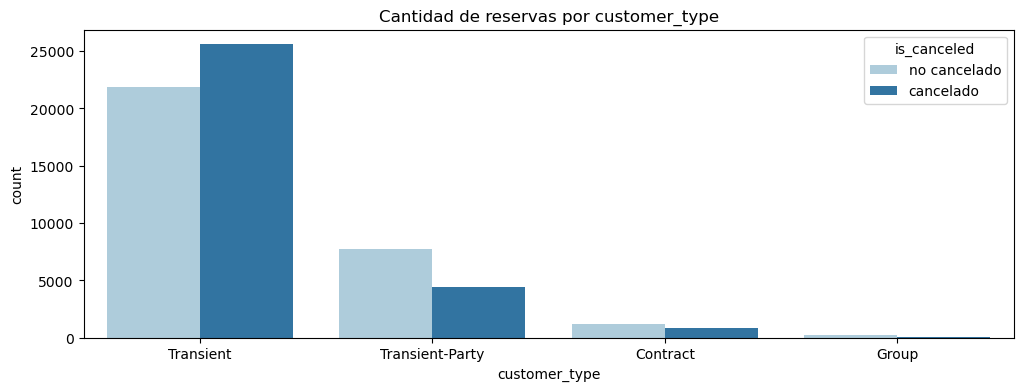

In [332]:
fig, ax = plt.subplots(figsize=(12, 4))

ax = sns.countplot(x="customer_type", hue="is_canceled", data=df, palette="Paired")
ax.set_title('Cantidad de reservas por customer_type')

plt.legend(title='is_canceled', labels=['no cancelado', 'cancelado'])
plt.show()

Al analizar el grafico, podemos apreciar como en su mayoria son reservas de tipo transient, y dentro de ese grupo, hay una leve tendencia a cancelar, pero casi que despreciable. Lo opuesto sucede en el resto de los grupos, donde hay una leve tendencia a mantener la reserva.

##### is_repeated_guest

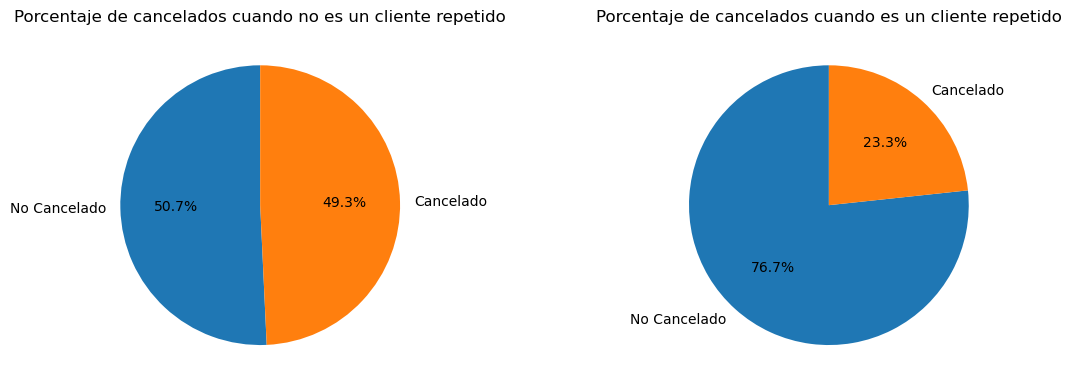

In [333]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

is_not_repeated = df[df['is_repeated_guest'] == 0]['is_canceled'].value_counts().reset_index()
is_not_repeated.columns = ['is_canceled', 'cantidad']
is_not_repeated['is_canceled'][0] = 'No Cancelado'
is_not_repeated['is_canceled'][1] = 'Cancelado'
ax1.pie(is_not_repeated['cantidad'], labels=is_not_repeated['is_canceled'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Porcentaje de cancelados cuando no es un cliente repetido')

is_repeated = df[df['is_repeated_guest'] == 1]['is_canceled'].value_counts().reset_index()
is_repeated.columns = ['is_canceled', 'cantidad']
is_repeated['is_canceled'][0] = 'No Cancelado'
is_repeated['is_canceled'][1] = 'Cancelado'
ax2.pie(is_repeated['cantidad'], labels=is_repeated['is_canceled'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Porcentaje de cancelados cuando es un cliente repetido')

plt.tight_layout()
plt.show()

Como se puede apreciar en los graficos de torta, en su mayoria los clientes repetidos tienden a no cancelar las reservas. A pesar de ello, teniendo en cuenta la tabla de frecuencias, tenemos que recordar que en su mayoria los clientes no son repetidos.

### Variables Irrelevantes

Hay varias variables que consideramos qie no seran relevantes a la hora de estimar la cancelacion de una reserva, las siguientes son:

- **year**: No aporta informacion relevante ya que las reservas tienden a tener patrones mas por mes/temporada que por año. Podria tenerse en consideracion si algun año en particular hubo algun evento que afecte directamente a las reservas, pero como son reservas de todas partes del mundo, y no ocurrio ningun evento como el COVID, o una guerra en los años a analizar en los años posibles (2015, 2016, 2017) no es relevante.



In [334]:
year_frequency = df["year"].value_counts().reset_index()
year_frequency.columns = ["Año", "Cantidad"]
year_frequency

,Año,Cantidad
0,2016,29362
1,2017,21066
2,2015,11485


- **day_of_month**: Al igual que year, no aporta informacion relevante ya que las reservas tienden a tener patrones mas por mes/temporada que por dia del mes. Podria argumentarse que en ciertos dias las reservas pueden verse afectadas, como por ejemplo en navidad, sin embargo, esos casos ya estan cubiertos por semana del año.

- **days_in_waiting_list**: Esta variable indica la cantidad de dias en lista de espera hasta que fue aceptada la reserva. Como pudimos observar en el analisis de las variables, el 75% de los datos son 0. Esto nos levanto alertas asi que decidimos investigar un poco mas sobre esta variable.

In [335]:
tabla = df['days_in_waiting_list'].value_counts().reset_index()
tabla.columns = ['Cantidad de dias de espera', 'Cantidad de reservas']
tabla['Porcentaje'] = round(tabla['Cantidad de reservas'] / df['days_in_waiting_list'].count() * 100, 2)
tabla

,Cantidad de dias de espera,Cantidad de reservas,Porcentaje
0,0,59678,96.39
1,39,155,0.25
2,31,90,0.15
3,44,83,0.13
4,58,82,0.13
...,...,...,...
111,81,1,0.00
112,121,1,0.00
113,97,1,0.00
114,193,1,0.00


Como podemos observar, mas del 95% de los dias de espera son 0, por lo tanto podemos asumir que esta variable no aporta informacion valiosa al analisis.

### Analisis de correlaciones entre variables

#### Entre variables cuantitativas

In [336]:
#Gráficos de a pares de variables con Seaborn
columns=[
  'lead_time',
#  'year',
 'week_number',
#  'day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
#  'adults',
#  'children',
#  'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'average_daily_rate',
 'is_canceled',
 ]
ds_pariplot=df[columns].copy()
# graf_pairplot=sns.pairplot(data=ds_pariplot, hue="is_canceled", palette=["r", "g"])

Hacemos un calculo de correlacion entre las variables cuantitativas para ver si existe alguna relacion entre ellas. Para esto, utilizamos el metodo de Pearson, el cual nos da un valor entre -1 y 1, donde 1 es una correlacion positiva perfecta, 0 es una correlacion nula y -1 es una correlacion negativa perfecta.

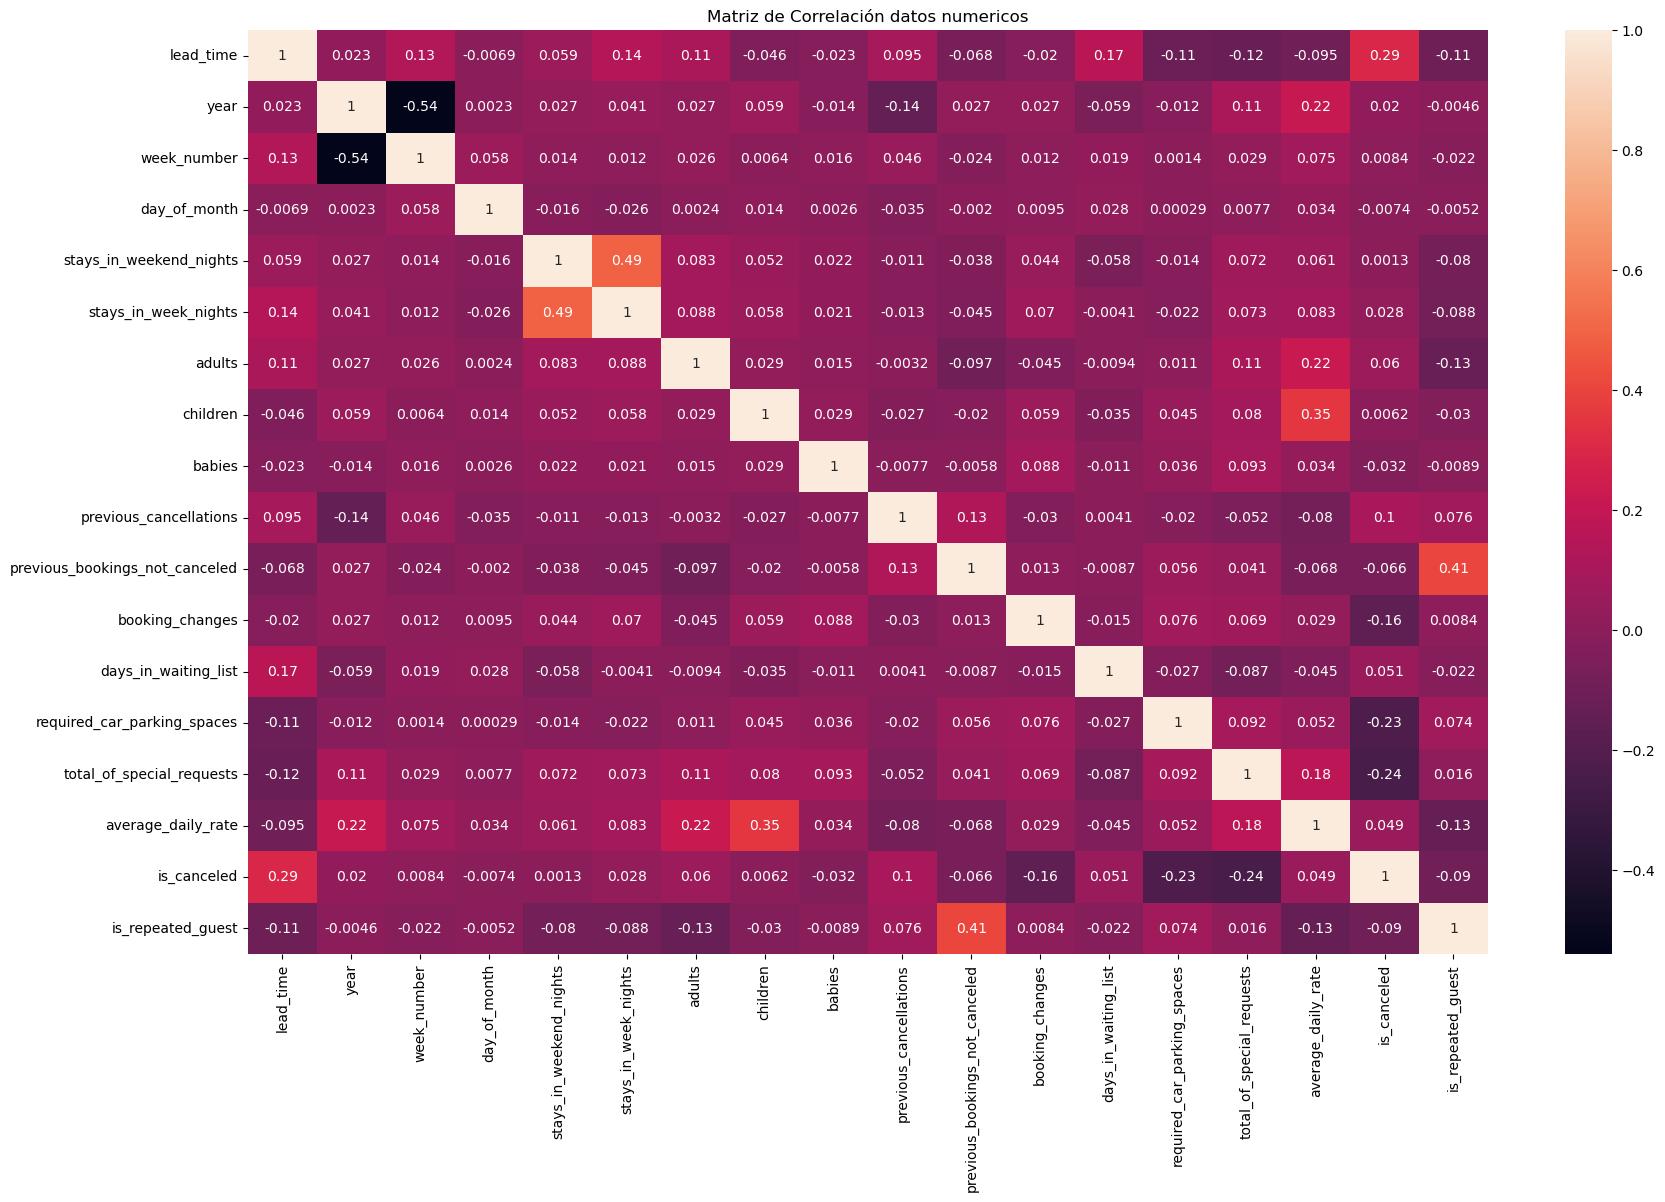

In [337]:
df_numerico = df[[
    'lead_time',
    'year',
    'week_number',
    'day_of_month',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'required_car_parking_spaces',
    'total_of_special_requests',
    'average_daily_rate',
    'is_canceled',
    'is_repeated_guest'
    ]]
correlation_matrix = df_numerico.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de Correlación datos numericos')
plt.show()

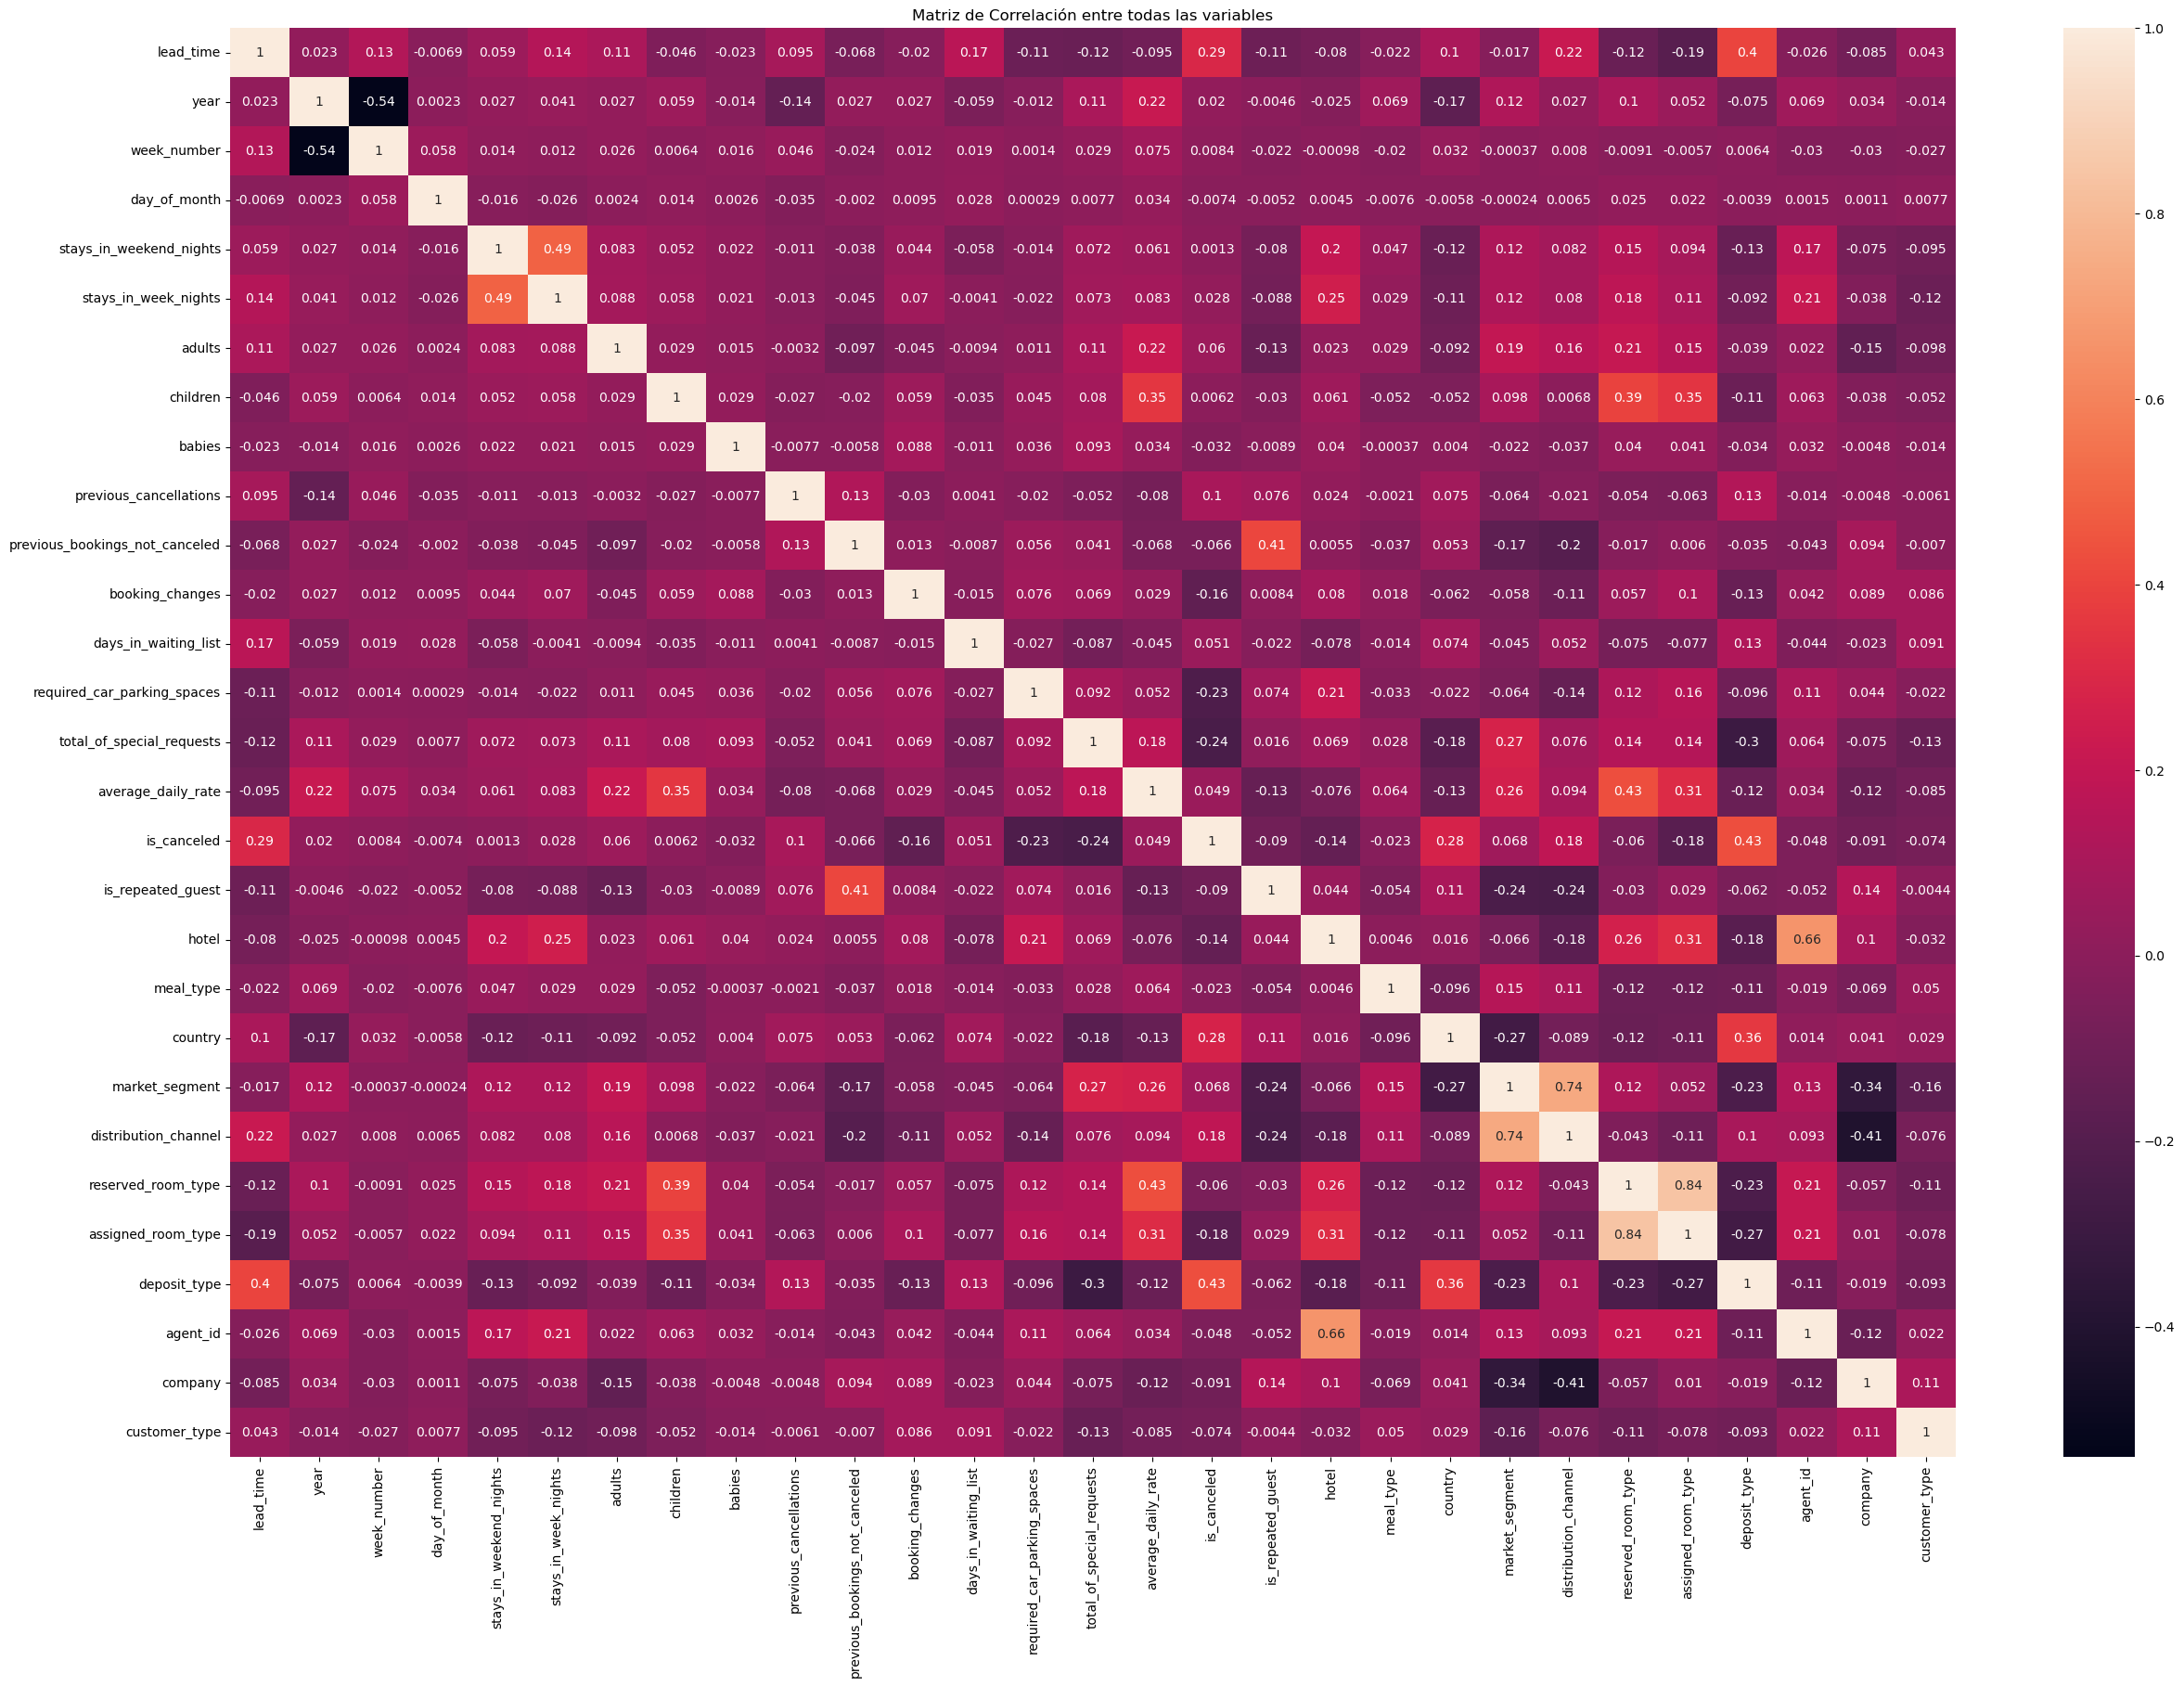

In [338]:
numeric_cols=[
    'lead_time',
    'year',
    'week_number',
    'day_of_month',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'required_car_parking_spaces',
    'total_of_special_requests',
    'average_daily_rate',
    'is_canceled',
    'is_repeated_guest'
]

categorical_cols=[
    'hotel',
    'meal_type',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'agent_id',
    'company',
    'customer_type',
    ]

df_categoric_correlation=df[numeric_cols].copy()

for column in categorical_cols:
    df_categoric_correlation[column] = df[column].astype('category').cat.codes
        
plt.figure(figsize=(30, 20))
sns.heatmap(df_categoric_correlation.corr(), annot=True)
plt.title('Matriz de Correlación entre todas las variables')
plt.show()

#### Comparacion total_people vs average_daily_rate

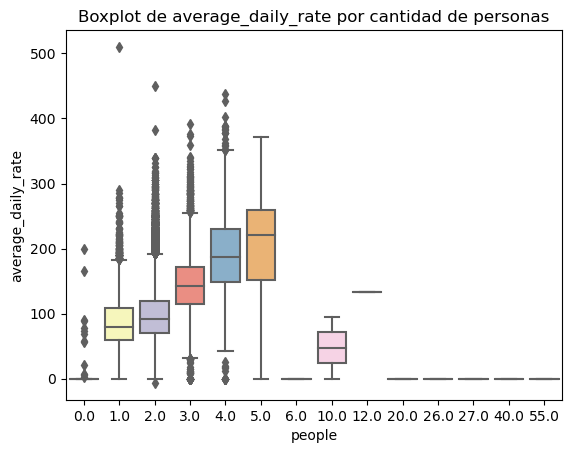

In [339]:
df_people=df[["adults",'children', 'babies', "average_daily_rate", 'is_canceled']].copy()

people = df_people['adults'] + df_people['children'] + df_people['babies']

df_people['people'] = people
df_people.drop(columns=['adults', 'children', 'babies'], inplace=True)


sns.boxplot(x="people", y="average_daily_rate", data=df_people, palette="Set3").set_title("Boxplot de average_daily_rate por cantidad de personas")
plt.show()

In [340]:
df_people[df_people['people'] >= 6].head()

,average_daily_rate,is_canceled,people
4064,0.0,1,40.0
11830,0.0,1,20.0
12659,95.0,0,10.0
13101,0.0,1,6.0
19146,0.0,1,26.0


Si descartamos los 5 casos donde la cantidad de personas en la reserva es mayor a 6, podemos observar cierta correlacion positiva entre la cantidad de personas y el average_daily_rate

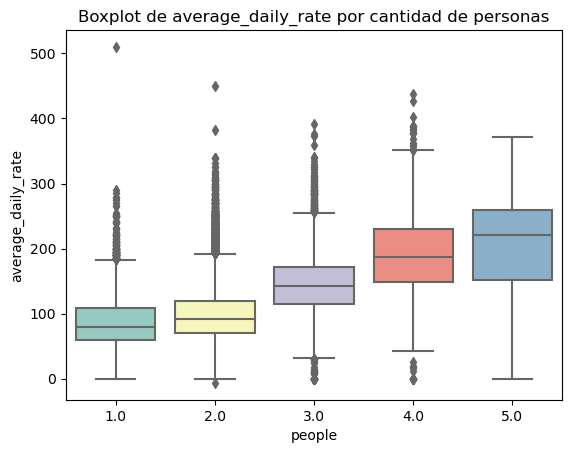

In [341]:
df_people.drop(df_people[(df_people['people'] >= 6) | (df_people['people'] == 0)].index, inplace=True)
sns.boxplot(x="people", y="average_daily_rate", data=df_people, palette="Set3").set_title("Boxplot de average_daily_rate por cantidad de personas")
plt.show()

#### Comparacion agent_id vs hotel

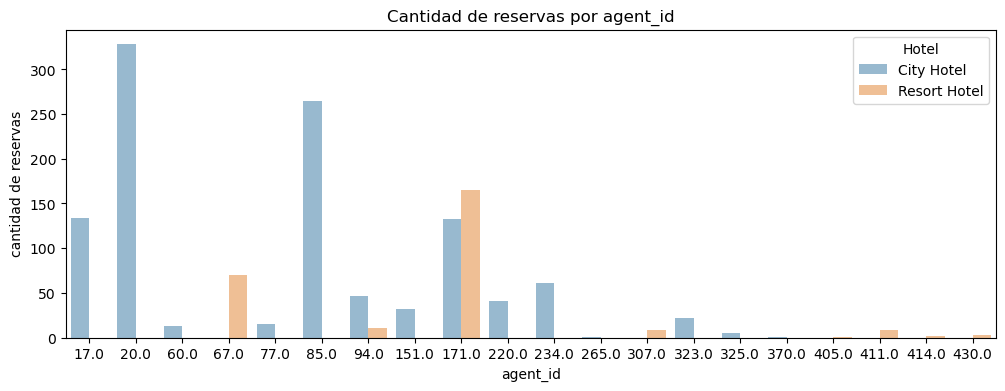

In [342]:
import random

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

random.seed(9)
sample_agent_ids = random.sample(df['agent_id'].unique().tolist(), 20)
df_sample = df[df['agent_id'].isin(sample_agent_ids)]
df_count_agents = df_sample.groupby(['agent_id', 'hotel']).size().reset_index(name='counts')
sns.barplot( x="agent_id",y='counts', data=df_count_agents, hue='hotel',  ax=ax, alpha=0.5)
ax.set_title('Cantidad de reservas por agent_id')
ax.set_xlabel('agent_id')
ax.set_ylabel('cantidad de reservas')
    
plt.legend(title='Hotel', loc = 'upper right')
plt.show()


Como podemos observar, hay una fuerte correlacion entre agent id y el hotel. Como habia muchos agented decidimos tomar una muestra aleatoria para poder visualizar los datos correctamente. Esta correlacion es esperable ya que cada agencia de viajes trabaja con ciertos hoteles, y no con todos.

#### Comparacion assigned_room_type vs average_daily_rate

Como podemos observar, existen ciertos room_types los cuales les generan mas ganancias al hotel.

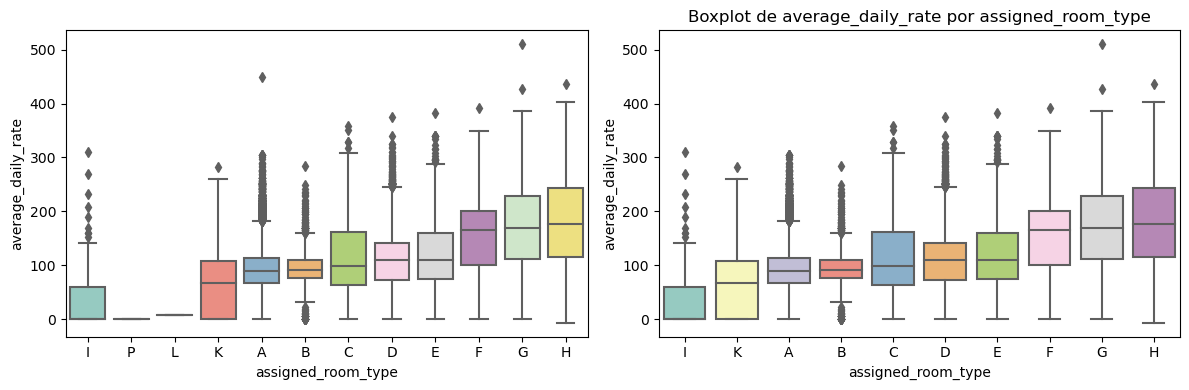

In [353]:
fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
medianas = df.groupby('assigned_room_type')['average_daily_rate'].median()
cuartos_ordenados = list(medianas.sort_values().index)

df_sorted = df.sort_values(by=['assigned_room_type'], key=lambda x: x.map(cuartos_ordenados.index))

sns.boxplot(x="assigned_room_type", y="average_daily_rate", data=df_sorted, palette="Set3", ax = ax1)

index_to_drop_l = df_sorted[df_sorted['assigned_room_type'] == 'L'].index
index_to_drop_p = df_sorted[df_sorted['assigned_room_type'] == 'P'].index
index_to_drop_a = df_sorted[(df_sorted['assigned_room_type'] == 'A') & (df_sorted['average_daily_rate'] > 400)].index
df_sorted.drop(index=index_to_drop_a, inplace=True)
df_sorted.drop(index=index_to_drop_l, inplace=True)
df_sorted.drop(index=index_to_drop_p, inplace=True)

sns.boxplot(x="assigned_room_type", y="average_daily_rate", data=df_sorted, palette="Set3", ax = ax2)
plt.title('Boxplot de average_daily_rate por assigned_room_type')
plt.tight_layout()
plt.show()

Tambien existe una correlacion entre el average_daily_rate y el assigned_room_type, como podemos apreciar en los boxplots, hay ciertos tipos de habitaciones donde el average_daily_rate es mayor. Es mas facil de apreciar la tendencia de los distintos tipos de habitaciones al estar ordenados por sus medias. Podemos ver que entre las habitaciones I y K no hay mucha diferencia, y que los valores combrendidos entre las habitaciones A y D es despreciable, sin embargo hay una gran diferencia entre las habitaciones E y H. Tambien filtramos 3 datos, un outlier de la categoria A, y dos categorias que no tenian datos suficientes para poder analizar.

#### Comparacion average_daily_rate y lead time vs week_number

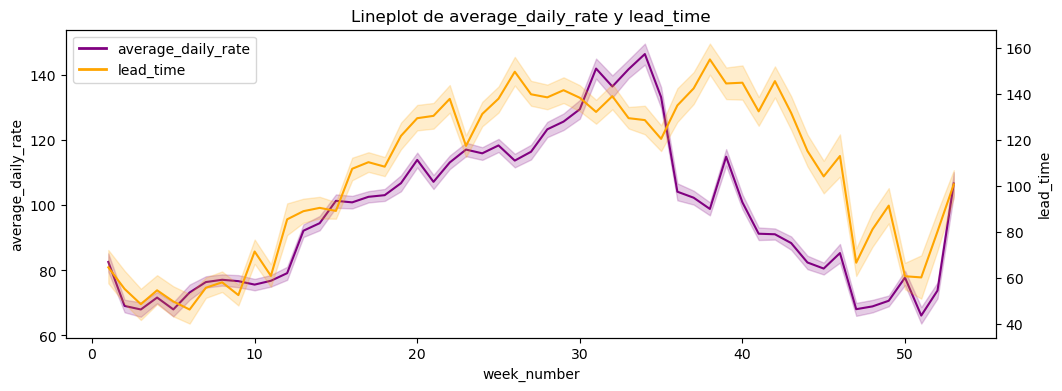

In [344]:
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.lineplot(x="week_number", y="average_daily_rate",data=df, color = 'purple')
ax2 = ax.twinx()
ax2 = sns.lineplot(x="week_number", y="lead_time",data=df, color='orange')

legend_etiquetas = ['average_daily_rate', 'lead_time']
legend_colores = ['purple', 'orange'] 

custom_legend = [plt.Line2D([0], [0], color=color, lw=2) for color in legend_colores]

plt.legend(custom_legend, legend_etiquetas, loc='upper left')
plt.title('Lineplot de average_daily_rate y lead_time')
plt.show()

Se puede ver una cierta correlacion entre las mismas, esto debido a que por ejemplo entre las semanas 20 y 30 el lead time aumenta debido a que es epoca de vacaciones en el hemisferio norte, y por lo tanto, las personas reservan con mas antelacion. Entonces como la demanda es mas alta, tambien sube el average_daily_rate.

#### Comparacion entre las naciones con mas reservas y el average_daily_rate

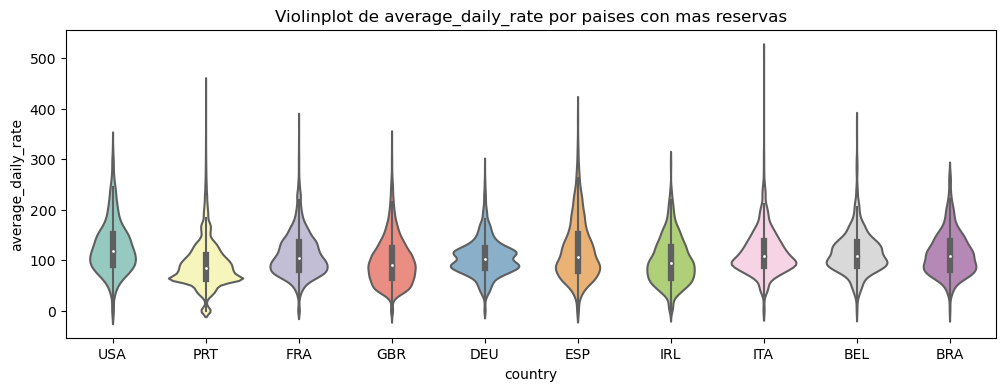

In [345]:
plt.figure(figsize=(12, 4))
naciones_con_mas_reservas = df['country'].value_counts().head(10).index
df_filtrado = df[df['country'].isin(naciones_con_mas_reservas)]
sns.violinplot(x="country", y="average_daily_rate", data=df_filtrado, palette="Set3")
plt.title('Violinplot de average_daily_rate por paises con mas reservas')
plt.show()

Notamos que no hay pais que le genere una gran ganancia al hotel, son todas muy parejas entre si. 

#### Comparacion entre la cantidad total de dias de estadia y la cantidad de cbooking_changes

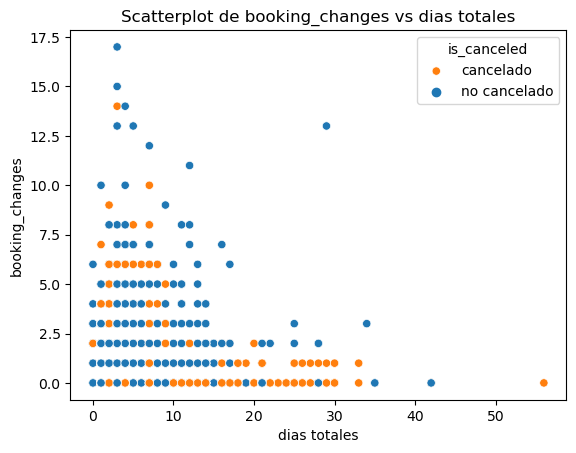

In [346]:
dias_totales = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
sns.scatterplot(x = dias_totales, y = "booking_changes", hue = "is_canceled", data=df).set(xlabel='dias totales')
plt.legend(title='is_canceled', labels=['cancelado', 'no cancelado'])
plt.title('Scatterplot de booking_changes vs dias totales')
plt.show()

Podemos notar un patron que las personas con mayor estadia y sin cambios previos tienden mas a cancelar las reservas.

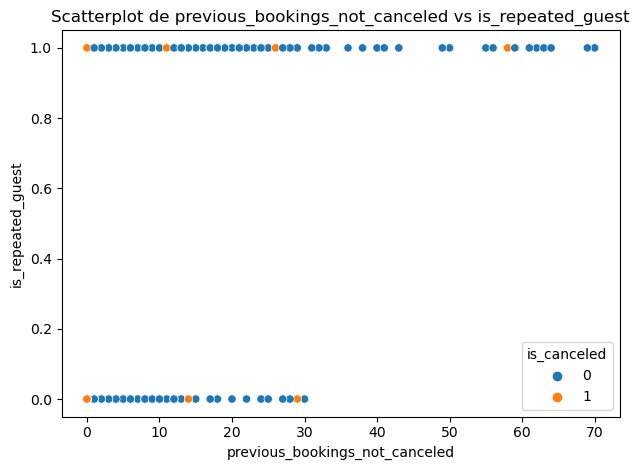

In [351]:
sns.scatterplot(data=df, x='previous_bookings_not_canceled', y='is_repeated_guest', hue='is_canceled')
plt.title('Scatterplot de previous_bookings_not_canceled vs is_repeated_guest')
plt.tight_layout()
plt.show()

Vimos que en el heatmap habia cierta correlacion interesante entre estas dos variables. Pero cuando indagamos mas profundo podemos notar que no es asi ya que la variable previous_bookings_not_canceled en su mayoria vale 0. Lo que pude ser que levante la correlacion son reservas del estilo que tienen mas de 50 reservas no canceladas lo cual no es muy usual. Mas tarde vamos a lidiar con este tipo de valores y decidir que hacer con los mismos.

In [ ]:
display(df['is_repeated_guest'].value_counts().reset_index())
display(df.groupby(['previous_bookings_not_canceled', 'is_repeated_guest', 'is_canceled']).size())

,index,is_repeated_guest
0,0,60008
1,1,1708


previous_bookings_not_canceled  is_repeated_guest  is_canceled
0                               0                  0              29249
                                                   1              30437
                                1                  0                201
                                                   1                295
1                               0                  0                147
                                                                  ...  
62                              1                  0                  1
63                              1                  0                  1
64                              1                  0                  1
69                              1                  0                  1
70                              1                  0                  1
Length: 101, dtype: int64

#### Comparacion entre el pais de origen de la reserva y su tipo de deposito

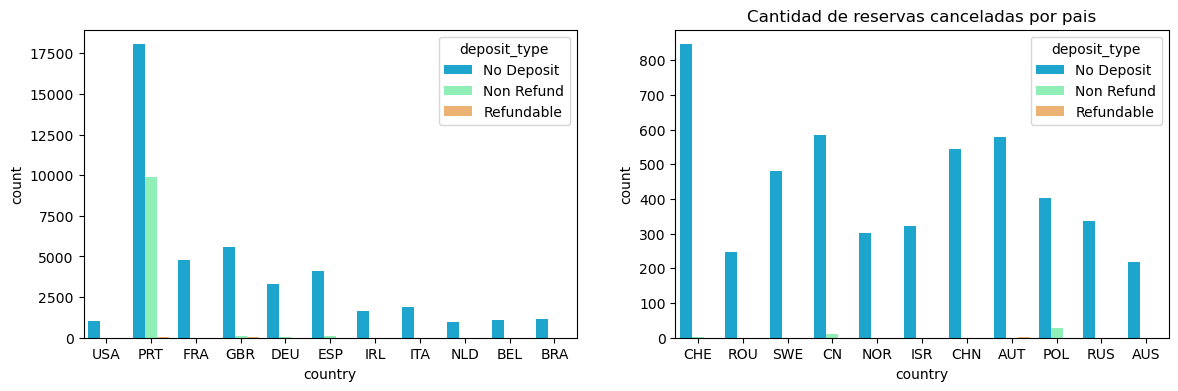

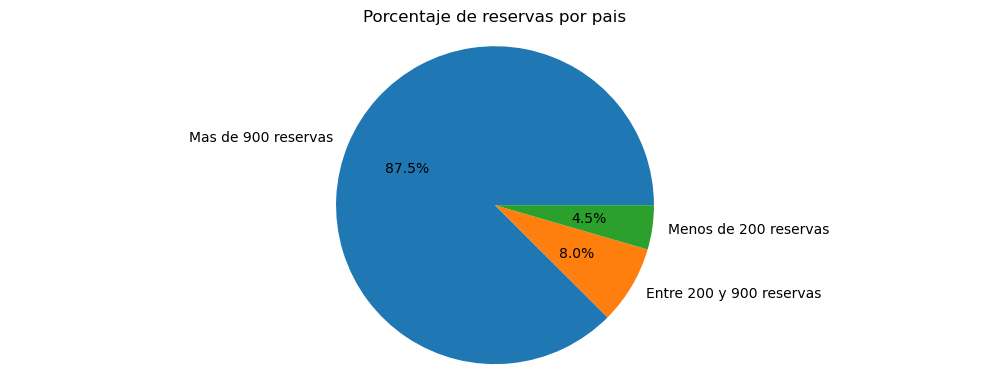

In [363]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
fig1, ax3 = plt.subplots(1, 1, figsize=(10, 4))

paises = df[['country']].value_counts().reset_index()
paises.columns = ['country', 'cantidad']
paises_mayoritarios = paises[paises['cantidad'] > 900]
paises_mid = paises[(paises['cantidad'] < 900) & (paises['cantidad'] > 200)]

df_may= df[df['country'].isin(paises_mayoritarios['country'])]
df_mid= df[df['country'].isin(paises_mid['country'])]
sns.countplot(x="country", hue="deposit_type", data=df_may, palette="rainbow", ax=ax1)
sns.countplot(x="country", hue="deposit_type", data=df_mid, palette="rainbow", ax=ax2)
ax2.set_title('Cantidad de reservas canceladas por pais')

mas_900 = paises_mayoritarios['cantidad'].sum()
menos_900 = paises_mid['cantidad'].sum()
menos_200 = paises[paises['cantidad'] < 200]['cantidad'].sum()

labels = 'Mas de 900 reservas', 'Entre 200 y 900 reservas', 'Menos de 200 reservas'

sizes = [mas_900, menos_900, menos_200]

ax3.pie(sizes, labels=labels, autopct='%1.1f%%')
ax3.axis('equal')
plt.title('Porcentaje de reservas por pais')



plt.tight_layout()
plt.show()

Decidimos hacer dos gaficos para poder visualizar los datos ya que el volumen de cantidad de paises es muy grande. En el primero graficamos donde hay mas de 900 reservas (representando el 87.5% de la poblacion), y como podemos observar la gran mayoria no tienen deposito. Sin embargo vemos que hay un pais en particular que aproximadamente  1/3 de sus reservas son sin reembolso, y este pais es Portugal. Esto podria explicarse, como se nombro anteriormente, que esto se debe por ser el pais local. Evaluando el sector del medio, entre 200 y 900 (representando el 8% de la poblacion), en su totalidad hay una cantidad infima de depositos con y sin reembolso comparado con la cantidad sin deposito. Y el ultim grupo decidimos no evaluarlo ya que la cantidad de paises era enorme y representa un porcentaje muy pequeño de la poblacion (4.5%).

#### Comparacion de children vs reserved_room_type

Primero hacemos un groupby para ver como esta distriubuida nuestra data para luego elegir la mejor opcion posible a la hora de graficar. Como la gran mayoria de las reservas tienen 0 hijos, decidimos splitear la data en reservas con 0 hijos y reservas con 1 o mas hijos.

In [354]:
df.groupby(['children', 'reserved_room_type']).size().reset_index(name='counts')

,children,reserved_room_type,counts
0,0.0,A,43683
1,0.0,B,393
2,0.0,C,124
3,0.0,D,9233
4,0.0,E,3036
5,0.0,F,619
6,0.0,G,305
7,0.0,H,56
8,0.0,L,1
9,0.0,P,7


Tambien filtramos temporalmente la reserva que tiene 10 hijos ya que no es usual y no nos aporta informacion relevante. Ademas filtramos las categorias C, P, H y L del grafico sin hijos ya que tienen un valor muy bajo y no se aprecia bien la distribucion.

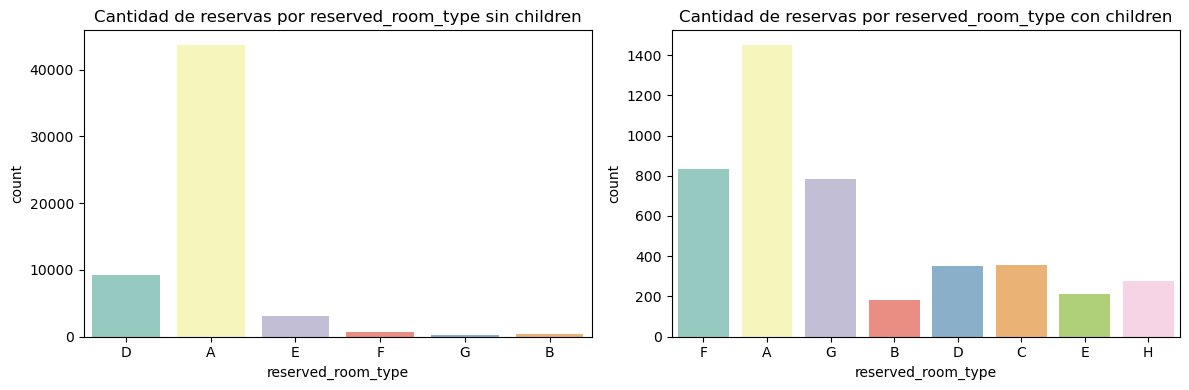

In [360]:
df_sin_children = df[df['children'] == 0]
df_con_children = df[(df['children'] > 0) & (df['children'] < 10)]

df_sin_children = df_sin_children[(df_sin_children['reserved_room_type']!='C')&(df_sin_children['reserved_room_type']!='P')
                                  &(df_sin_children['reserved_room_type']!='H')&(df_sin_children['reserved_room_type']!='L')]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x="reserved_room_type", data=df_sin_children, palette="Set3", ax=ax1)
sns.countplot(x="reserved_room_type", data=df_con_children, palette="Set3", ax=ax2)

ax1.set_title('Cantidad de reservas por reserved_room_type sin children')
ax2.set_title('Cantidad de reservas por reserved_room_type con children')
plt.tight_layout()
plt.show()


Existe una tendencia a que las reservas sin hijos vayan a la habitacion A. Podriamos suponder que se trata de una habitacion para parejas pero esto no nos parece correcto ya que cuanfo vemo el otro grafico, donde tienen hijos, tambien se ve una tendencia a la habitacion A. Por lo tanto, podriamos suponer que la habitacion A es la mas barata y por lo tanto, la mas reservada.

### Manipulacion de datos

#### Actualizacion de datos

##### total_nights

In [ ]:
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df.head()

,hotel,lead_time,year,month,week_number,day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent_id,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_nights
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,3
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,0,BB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,1
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,0,BB,CHE,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,1
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,7
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0,7


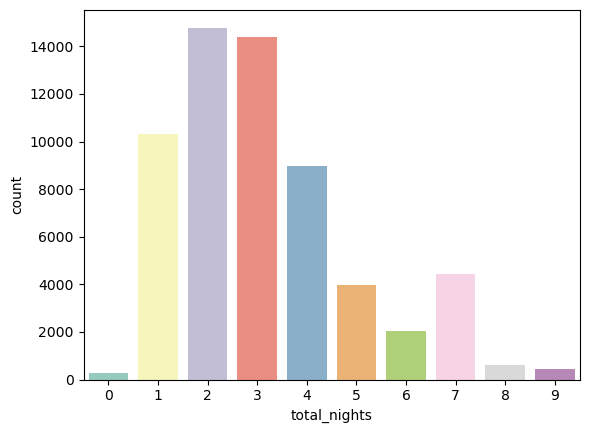

In [ ]:
total_nights = df[df['total_nights'] < 10]
sns.countplot(x="total_nights", data=total_nights, palette="Set3")
plt.show()

##### adults, children and babies

Vamos a retomar el analisis de estas variables ya que nos dimos cuenta que hay reservas que no tienen adultos, y esto no tiene sentido. Por lo tanto, vamos a filtrar el dataset para quedarnos con las reservas que tengan al menos un adulto.

In [ ]:
df_sin_adultos = df[df['adults'] <= 0]
df_sin_adultos.head()


,hotel,lead_time,year,month,week_number,day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent_id,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_nights
96,City Hotel,23,2016,May,21,21,2,4,0,2.0,0,BB,IND,Online TA,TA/TO,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient,128.49,0,0,dcaf076d-bd38-47dd-8d9d-16be09cd5b08,1,6
212,City Hotel,315,2017,July,27,7,0,1,0,2.0,0,BB,USA,Online TA,TA/TO,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient,91.85,0,2,55c9b5f9-b5d0-49a2-9348-c6476a0bd772,1,1
270,City Hotel,4,2017,February,8,21,0,3,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient-Party,0.00,0,0,6a48e05e-c36a-41d0-b7e0-5f8b92dab109,1,3
326,City Hotel,53,2016,November,49,29,0,4,0,2.0,0,BB,ROU,Online TA,TA/TO,0,0,0,B,A,0,No Deposit,9.0,NaN,0,Transient,77.86,0,2,74fe3153-e2ae-4650-a375-05fc52881a56,0,4
464,City Hotel,64,2015,October,42,16,2,3,0,0.0,0,SC,FRA,Offline TA/TO,TA/TO,0,0,0,A,K,2,No Deposit,50.0,NaN,0,Transient-Party,0.00,0,0,cfe370c2-298a-4de8-82fd-f8d418febd7f,0,5


In [ ]:
df_sin_adultos.shape

(197, 32)

In [ ]:
df.drop(df[df['adults'] <= 0].index, inplace=True)
df.shape

(61716, 32)

Tenemos 197 reservas las cuales no tienen sentido, por lo tanto las vamos a eliminar. Una vez hecho esto, ahora podemos crear una columna nueva a nuestro dataset la cual va a contener el numero total de persoans por cada reserva.

In [ ]:
df['total_people'] = df['adults'] + df['children'] + df['babies']

##### meal_type

In [ ]:
df['meal_type'].replace(['SC', 'Undefined'], 'NoMeal', inplace=True)
df['meal_type'].value_counts()

BB        47690
HB         7446
NoMeal     6103
FB          477
Name: meal_type, dtype: int64

Vamos a unificar los registros que contengan SC con undefined ya que ambos apuntan a lo mismo, que no hay meal. Esto fue tomado tal como dice en el paper.

#### Datos faltantes

In [ ]:
NAs_table = df.isna().sum().reset_index()
NAs_table.columns = ['columna', 'cantidad']

NAs_table['porcentaje'] = round(NAs_table['cantidad'] / df.shape[0] * 100, 2)
NAs_table.drop(NAs_table[NAs_table['cantidad'] == 0].index, inplace=True)

NAs_table

,columna,cantidad,porcentaje
9,children,4,0.01
12,country,216,0.35
22,agent_id,7862,12.74
23,company,58575,94.91
32,total_people,4,0.01


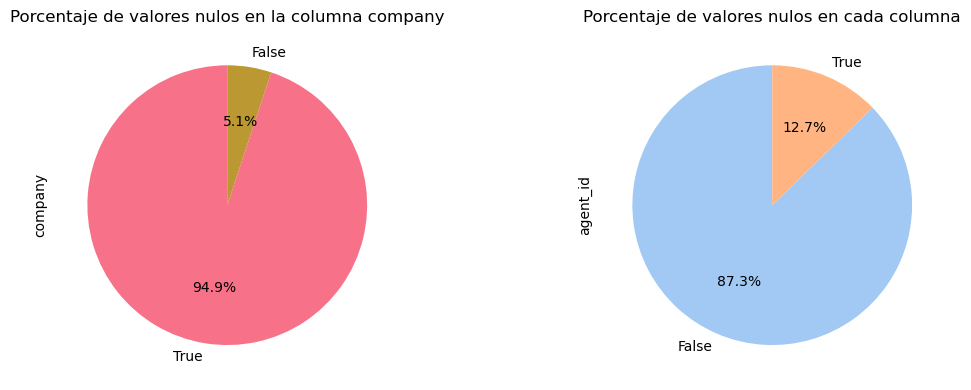

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

df['company'].isna().value_counts().plot(kind='pie', ax=ax1,startangle=90, autopct='%1.1f%%', colors=sns.color_palette("husl"))
ax1.title.set_text('Porcentaje de valores nulos en la columna company')

df['agent_id'].isna().value_counts().plot(kind='pie', ax=ax2,startangle=90, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
ax2.title.set_text('Porcentaje de valores nulos en la columna agent_id')

plt.title('Porcentaje de valores nulos en cada columna')
plt.tight_layout()
plt.show()

Solo graficamos los valores mas relevantes ya que los graficos con valores bajos no son muy agradables a la vista.

##### company

Decidimos eliminar esta columna ya que casi el 95% de los datos son NAs, aportando muy poca informacion util al analisis, donde cualquier prediccion que querramos hacer de esta variable va a estar sesgada debido a la poca cantidad de datos reales que tenemos disponibles.

In [ ]:
df.drop(columns=['company'], inplace=True)

A continuacion vamos a analizar los casos donde faltan valores para la variable children. Como son pocos casos de nustero dataset, vamos a rellenar con 0 y luego, vamos a actualizar la columna de total_people.

In [ ]:
undefined_children = df[df['children'].isna()]
undefined_children.head()

,hotel,lead_time,year,month,week_number,day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent_id,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_nights,total_people
27359,City Hotel,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,0,Transient-Party,18.0,0,2,6ad2b270-d3ae-464f-9d4d-0722e4c4e7bc,1,2,NaN
32654,City Hotel,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,0,Transient-Party,12.0,0,1,af8b8f11-dae4-494a-81f9-9aabb9d3b9ba,1,2,NaN
50323,City Hotel,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,0,Transient-Party,76.5,0,1,322fd306-7177-4752-88c2-891293fceba6,1,7,NaN
58511,City Hotel,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,0,Transient-Party,12.0,0,1,d94b4fca-243f-498c-a52f-14b52e7e5e72,1,1,NaN


In [ ]:
df['children'].fillna(0, inplace=True)
df['total_people'] = df['adults'] + df['children'] + df['babies']
df.isna().sum().reset_index()

,index,0
0,hotel,0
1,lead_time,0
2,year,0
3,month,0
4,week_number,0
5,day_of_month,0
6,stays_in_weekend_nights,0
7,stays_in_week_nights,0
8,adults,0
9,children,0


In [ ]:
df[(df['agent_id'].isna()) & (df['distribution_channel']!= 'Direct')].shape


(4395, 32)

In [ ]:
df[df['adults'] < df['required_car_parking_spaces']].head()

,hotel,lead_time,year,month,week_number,day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent_id,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_nights,total_people
8269,Resort Hotel,138,2017,March,12,19,2,2,2,0.0,0,HB,AUT,Direct,Corporate,1,0,2,E,F,1,No Deposit,NaN,122,Transient-Party,80.0,8,0,174365a6-2548-48c4-ae12-7842d5498f12,0,4,2.0
13713,Resort Hotel,205,2017,June,26,26,3,10,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,2,No Deposit,250.0,0,Transient,111.0,3,0,4267af65-0a89-4489-b099-e0332c6c51fe,0,13,2.0
